In [1]:
import numpy as np

In [2]:
with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_images_1D_5cat.npy', 'rb') as f:
    a_images_1D = np.load(f)
    
with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_label_5cat.npy', 'rb') as f:
    a_label = np.load(f)

with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_epidural_num_5cat.npy', 'rb') as f:
    a_epidural_num = np.load(f)

# Transforming labels to numerical categories

In [3]:
a_label_num = np.copy(a_label)

In [4]:
a_label_num[a_label_num == "fat"] = 0
a_label_num[a_label_num == "ligament"] = 1
a_label_num[a_label_num == "flavum"] = 2
a_label_num[a_label_num == "empty"] = 3
a_label_num[a_label_num == "spinalcord"] = 4

In [5]:
a_label_num = a_label_num.astype(int)

In [6]:
a_label_num

array([1, 1, 1, ..., 3, 3, 3])

# ResNet50 5cat

In [285]:
with open('/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/pred_val_K1_outer_k2_val.npy', 'rb') as f:
    prob_K1_outer_k2 = np.load(f)

In [286]:
prob_K1_outer_k2.shape

(5000, 5)

In [287]:
prob_K1_outer_k2

array([[9.9425250e-01, 5.7475022e-03, 2.6285283e-09, 5.5306124e-11,
        1.0522640e-10],
       [2.4344721e-03, 9.9756551e-01, 1.4531176e-10, 2.0817877e-11,
        5.4900789e-10],
       [1.3065376e-04, 9.9986935e-01, 1.6235961e-10, 2.4861642e-11,
        6.1883130e-09],
       ...,
       [2.1740740e-13, 0.0000000e+00, 2.6093515e-13, 1.0000000e+00,
        0.0000000e+00],
       [2.7644109e-13, 0.0000000e+00, 2.8538500e-13, 1.0000000e+00,
        0.0000000e+00],
       [4.6644698e-15, 0.0000000e+00, 5.9595790e-15, 1.0000000e+00,
        0.0000000e+00]], dtype=float32)

In [288]:
# K1 outer - k2 
a_selected_epidural_val = [2]
index = 1

a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
print("a_epidural_num_val = ", a_epidural_num_val)   

bool_epidural_num = a_epidural_num != index

a_label_num_7_epidurals = a_label_num[bool_epidural_num]
a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

y_cv = a_label_num_7_epidurals

index_val = a_epidural_num_val[0]

bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
bool_train_epidural = ~bool_val_epidural

y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]  

a_epidural_num_val =  [2]


In [289]:
y_val.shape

(5000,)

In [290]:
a_epidural_num_val[0]

2

In [291]:
pred_K1_outer_k2 = np.argmax(prob_K1_outer_k2, axis=-1)

In [292]:
pred_K1_outer_k2

array([0, 1, 1, ..., 3, 3, 3])

In [293]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, pred_K1_outer_k2))

[[ 843    0  148    0    9]
 [ 245  755    0    0    0]
 [ 119    0  867    0   14]
 [   0    0    0 1000    0]
 [ 512   49  337    0  102]]


## All combinations Confusion Matrix

In [294]:
from sklearn.metrics import confusion_matrix

In [295]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/"
dirs = os.listdir( path )

In [29]:
dirs

['history_K6_outer_k7_val',
 'pred_val_K5_outer_k2_val.npy',
 'time_total_K8_outer_k6_val.npy',
 'time_total_K8_outer_k2_val.npy',
 'pred_val_K5_outer_k6_val.npy',
 'time_total_K7_outer_k8_val.npy',
 'pred_val_K2_outer_k3_val.npy',
 'time_total_K7_outer_k4_val.npy',
 'pred_val_K2_outer_k7_val.npy',
 'pred_val_K4_outer_k2_val.npy',
 'time_total_K1_outer_k5_val.npy',
 'history_K5_outer_k7_val',
 'pred_val_K4_outer_k6_val.npy',
 'time_total_K6_outer_k4_val.npy',
 'history_K8_outer_k1_val',
 'history_K4_outer_k7_val',
 'pred_val_K3_outer_k7_val.npy',
 'time_total_K6_outer_k8_val.npy',
 'history_K8_outer_k6_val',
 'history_K1_outer_k7_val',
 'time_total_K5_outer_k8_val.npy',
 'pred_val_K8_outer_k4_val.npy',
 'time_total_K5_outer_k4_val.npy',
 'time_total_K2_outer_k1_val.npy',
 'pred_val_K7_outer_k6_val.npy',
 'pred_val_K7_outer_k2_val.npy',
 'time_total_K2_outer_k5_val.npy',
 'pred_val_K1_outer_k7_val.npy',
 'pred_val_K1_outer_k3_val.npy',
 'history_K2_outer_k7_val',
 'time_total_K4_outer_k

In [30]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [31]:
l_pred_files

['pred_val_K5_outer_k2_val.npy',
 'pred_val_K5_outer_k6_val.npy',
 'pred_val_K2_outer_k3_val.npy',
 'pred_val_K2_outer_k7_val.npy',
 'pred_val_K4_outer_k2_val.npy',
 'pred_val_K4_outer_k6_val.npy',
 'pred_val_K3_outer_k7_val.npy',
 'pred_val_K8_outer_k4_val.npy',
 'pred_val_K7_outer_k6_val.npy',
 'pred_val_K7_outer_k2_val.npy',
 'pred_val_K1_outer_k7_val.npy',
 'pred_val_K1_outer_k3_val.npy',
 'pred_val_K6_outer_k2_val.npy',
 'pred_val_K8_outer_k5_val.npy',
 'pred_val_K8_outer_k1_val.npy',
 'pred_val_K7_outer_k3_val.npy',
 'pred_val_K1_outer_k6_val.npy',
 'pred_val_K1_outer_k2_val.npy',
 'pred_val_K6_outer_k7_val.npy',
 'pred_val_K6_outer_k3_val.npy',
 'pred_val_K5_outer_k3_val.npy',
 'pred_val_K5_outer_k7_val.npy',
 'pred_val_K2_outer_k6_val.npy',
 'pred_val_K4_outer_k3_val.npy',
 'pred_val_K4_outer_k7_val.npy',
 'pred_val_K3_outer_k2_val.npy',
 'pred_val_K3_outer_k6_val.npy',
 'pred_val_K7_outer_k5_val.npy',
 'pred_val_K7_outer_k1_val.npy',
 'pred_val_K8_outer_k7_val.npy',
 'pred_val

In [32]:
l_conf = []

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_val, pred_temp))
    
    np.savetxt('Confusion_matrix_K%s_outer_k%s.csv'%(k_outer, k_val), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
    if k_val != 7:
        l_conf.append(temp_conf)

pred_val_K5_outer_k2_val.npy
k_outer =  5
k_val =  2
a_epidural_num_val =  [2]
pred_val_K5_outer_k6_val.npy
k_outer =  5
k_val =  6
a_epidural_num_val =  [6]
pred_val_K2_outer_k3_val.npy
k_outer =  2
k_val =  3
a_epidural_num_val =  [3]
pred_val_K2_outer_k7_val.npy
k_outer =  2
k_val =  7
a_epidural_num_val =  [7]
pred_val_K4_outer_k2_val.npy
k_outer =  4
k_val =  2
a_epidural_num_val =  [2]
pred_val_K4_outer_k6_val.npy
k_outer =  4
k_val =  6
a_epidural_num_val =  [6]
pred_val_K3_outer_k7_val.npy
k_outer =  3
k_val =  7
a_epidural_num_val =  [7]
pred_val_K8_outer_k4_val.npy
k_outer =  8
k_val =  4
a_epidural_num_val =  [4]
pred_val_K7_outer_k6_val.npy
k_outer =  7
k_val =  6
a_epidural_num_val =  [6]
pred_val_K7_outer_k2_val.npy
k_outer =  7
k_val =  2
a_epidural_num_val =  [2]
pred_val_K1_outer_k7_val.npy
k_outer =  1
k_val =  7
a_epidural_num_val =  [7]
pred_val_K1_outer_k3_val.npy
k_outer =  1
k_val =  3
a_epidural_num_val =  [3]
pred_val_K6_outer_k2_val.npy
k_outer =  6
k_val =  2

In [33]:
a_conf = np.stack(l_conf)
a_conf.shape

(49, 5, 5)

In [34]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('Confusion_matrix_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[2.76734694e+02 9.36938776e+01 1.19693878e+02 0.00000000e+00
  5.09877551e+02]
 [1.26346939e+02 8.44489796e+02 3.73469388e+00 0.00000000e+00
  2.54285714e+01]
 [1.20040816e+02 1.81428571e+01 6.64734694e+02 2.04081633e-02
  1.97061224e+02]
 [8.16326531e-02 0.00000000e+00 0.00000000e+00 9.99918367e+02
  0.00000000e+00]
 [3.08061224e+02 4.72857143e+01 2.08000000e+02 2.04081633e-02
  4.36632653e+02]]


In [35]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('Confusion_matrix_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[3.99894798e+01 2.05147869e+01 1.65654509e+01 0.00000000e+00
  4.50596868e+01]
 [3.21366635e+01 3.13335979e+01 1.23760847e+00 0.00000000e+00
  4.47055245e+00]
 [2.40878574e+01 6.41673676e+00 4.11760149e+01 2.01988432e-02
  3.30827772e+01]
 [8.07953729e-02 0.00000000e+00 0.00000000e+00 8.07953729e-02
  0.00000000e+00]
 [3.54824946e+01 1.38220378e+01 2.40211451e+01 2.01988432e-02
  3.58823764e+01]]


In [36]:
int(k_val)

5

In [37]:
temp_conf

array([[   0,    0,    0,    0, 1000],
       [   0,  936,    0,    0,   64],
       [   0,    0,  936,    0,   64],
       [   0,    0,    0, 1000,    0],
       [  80,   23,  589,    0,  308]])

In [38]:
y_val.shape

(5000,)

In [39]:
pred_temp.shape

(5000,)

## I1 Outer I2 ROC

Source: [Link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [41]:
y_val_K1_outer_k2_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])

In [42]:
y_val_K1_outer_k2_bin

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [44]:
y_val_K1_outer_k2_bin.shape

(5000, 5)

In [45]:
n_classes = 5

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_K1_outer_k2_bin[:, i], prob_K1_outer_k2[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [48]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_K1_outer_k2_bin.ravel(), prob_K1_outer_k2.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

<ipython-input-55-312bdb61fc3a>:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


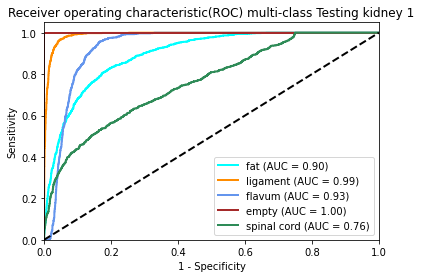

In [55]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

lw = 2

l_types = ["fat","ligament","flavum","empty","spinal cord"]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc[i]))

# for i, type_name in zip([0,1,2,3,4], l_types):
#     plt.plot(fpr[i], tpr[i], lw=lw,
#              label='{0} (AUC = {1:0.2f})'
#              ''.format(type_name, roc_auc[i]))  

    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('Receiver operating characteristic(ROC) multi-class Testing kidney 1')
plt.legend(loc="lower right")
# plt.savefig("./ROC_tests/ROC_kidney1.jpg", dpi=300)
plt.show()

## All individuals ROC

In [296]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/"
dirs = os.listdir( path )

In [297]:
dirs

['time_total_K2_outer_k7_val.npy',
 'history_K5_outer_k2_val',
 'pred_val_K3_outer_k1_val.npy',
 'pred_val_K3_outer_k5_val.npy',
 'time_total_K2_outer_k3_val.npy',
 'history_K8_outer_k3_val',
 'history_K4_outer_k5_val',
 'pred_val_K4_outer_k8_val.npy',
 'time_total_K5_outer_k6_val.npy',
 'history_K4_outer_k2_val',
 'history_K8_outer_k4_val',
 'time_total_K5_outer_k2_val.npy',
 'history_K6_outer_k5_val',
 'pred_val_K2_outer_k1_val.npy',
 'time_total_K3_outer_k7_val.npy',
 'pred_val_K2_outer_k5_val.npy',
 'history_K6_outer_k2_val',
 'time_total_K4_outer_k6_val.npy',
 'time_total_K4_outer_k2_val.npy',
 'history_K7_outer_k2_val',
 'pred_val_K5_outer_k4_val.npy',
 'history_K7_outer_k5_val',
 'pred_val_K5_outer_k8_val.npy',
 'pred_val_K6_outer_k8_val.npy',
 'time_total_K7_outer_k2_val.npy',
 'pred_val_K6_outer_k4_val.npy',
 'history_K2_outer_k5_val',
 'time_total_K7_outer_k6_val.npy',
 'pred_val_K1_outer_k5_val.npy',
 'history_K3_outer_k5_val',
 'time_total_K8_outer_k4_val.npy',
 'history_K3

In [298]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [299]:
l_pred_files

['pred_val_K3_outer_k1_val.npy',
 'pred_val_K3_outer_k5_val.npy',
 'pred_val_K4_outer_k8_val.npy',
 'pred_val_K2_outer_k1_val.npy',
 'pred_val_K2_outer_k5_val.npy',
 'pred_val_K5_outer_k4_val.npy',
 'pred_val_K5_outer_k8_val.npy',
 'pred_val_K6_outer_k8_val.npy',
 'pred_val_K6_outer_k4_val.npy',
 'pred_val_K1_outer_k5_val.npy',
 'pred_val_K7_outer_k4_val.npy',
 'pred_val_K7_outer_k8_val.npy',
 'pred_val_K8_outer_k6_val.npy',
 'pred_val_K8_outer_k2_val.npy',
 'pred_val_K6_outer_k5_val.npy',
 'pred_val_K6_outer_k1_val.npy',
 'pred_val_K1_outer_k8_val.npy',
 'pred_val_K1_outer_k4_val.npy',
 'pred_val_K7_outer_k5_val.npy',
 'pred_val_K7_outer_k1_val.npy',
 'pred_val_K8_outer_k7_val.npy',
 'pred_val_K8_outer_k3_val.npy',
 'pred_val_K3_outer_k8_val.npy',
 'pred_val_K3_outer_k4_val.npy',
 'pred_val_K4_outer_k1_val.npy',
 'pred_val_K4_outer_k5_val.npy',
 'pred_val_K2_outer_k4_val.npy',
 'pred_val_K2_outer_k8_val.npy',
 'pred_val_K5_outer_k1_val.npy',
 'pred_val_K1_outer_k6_val.npy',
 'pred_val

pred_val_K3_outer_k1_val.npy
k_outer =  3
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


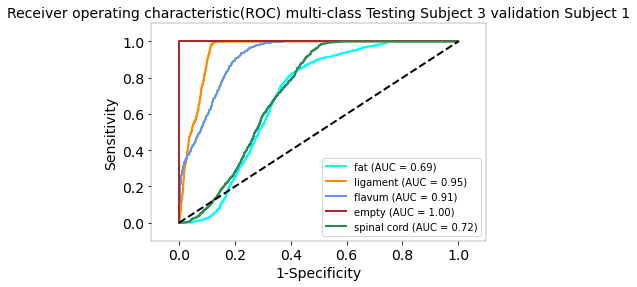

pred_val_K3_outer_k5_val.npy
k_outer =  3
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


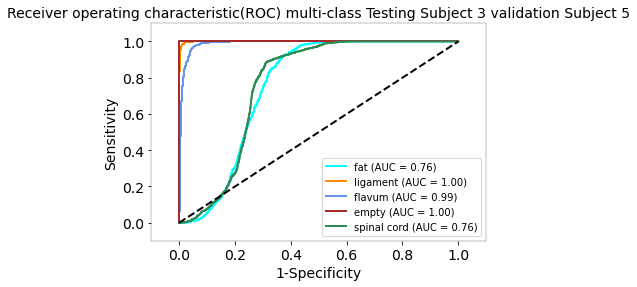

pred_val_K4_outer_k8_val.npy
k_outer =  4
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


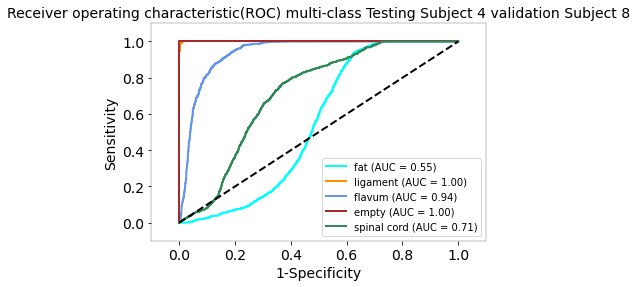

pred_val_K2_outer_k1_val.npy
k_outer =  2
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


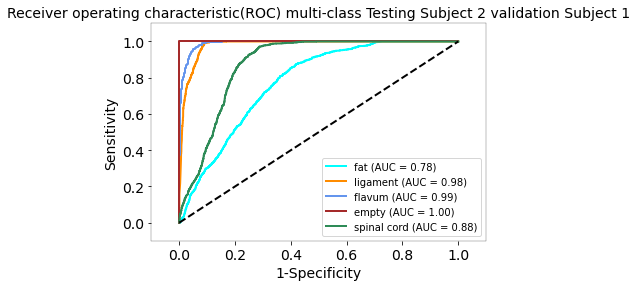

pred_val_K2_outer_k5_val.npy
k_outer =  2
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


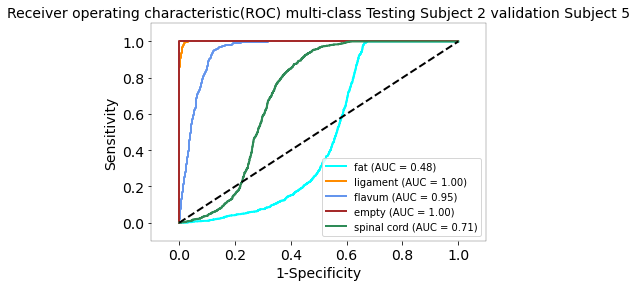

pred_val_K5_outer_k4_val.npy
k_outer =  5
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


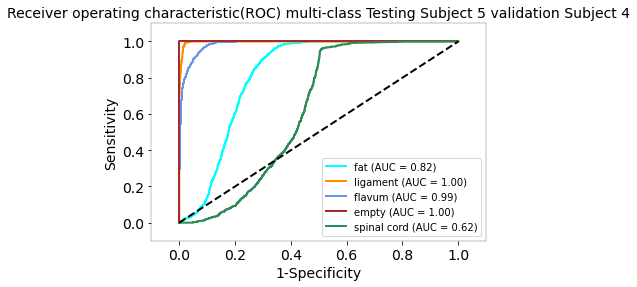

pred_val_K5_outer_k8_val.npy
k_outer =  5
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


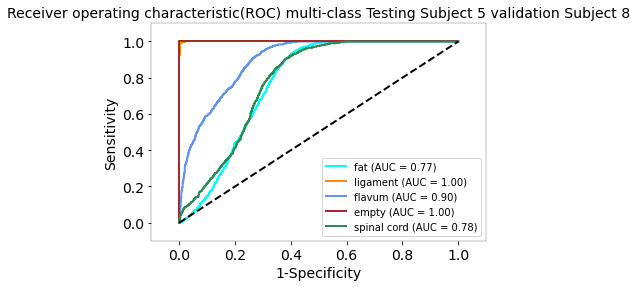

pred_val_K6_outer_k8_val.npy
k_outer =  6
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


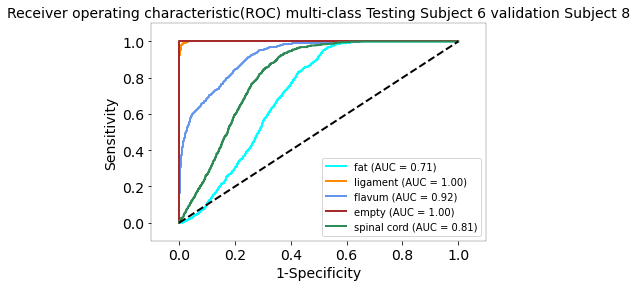

pred_val_K6_outer_k4_val.npy
k_outer =  6
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


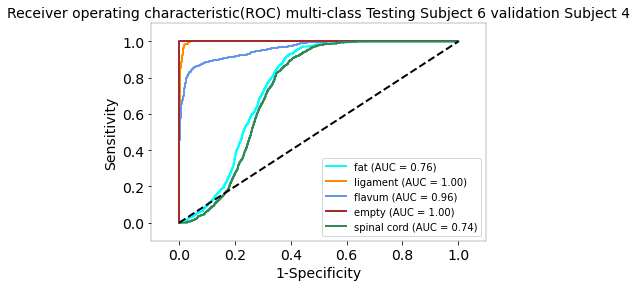

pred_val_K1_outer_k5_val.npy
k_outer =  1
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


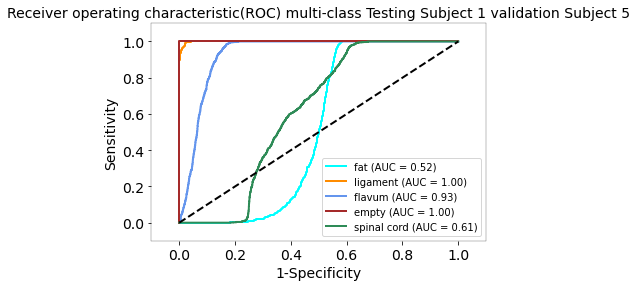

pred_val_K7_outer_k4_val.npy
k_outer =  7
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


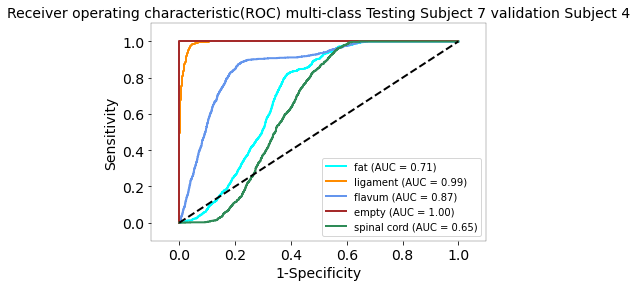

pred_val_K7_outer_k8_val.npy
k_outer =  7
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


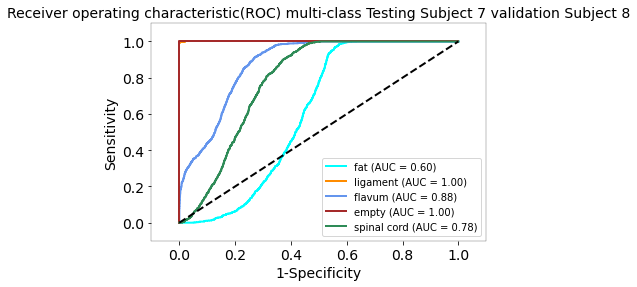

pred_val_K8_outer_k6_val.npy
k_outer =  8
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


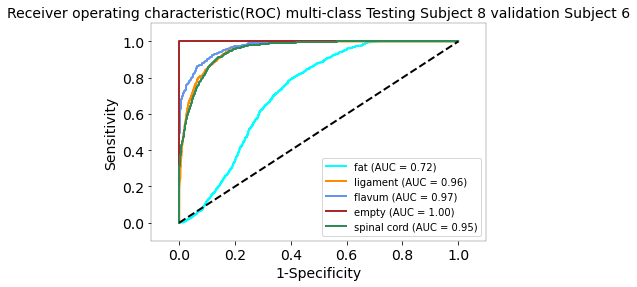

pred_val_K8_outer_k2_val.npy
k_outer =  8
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


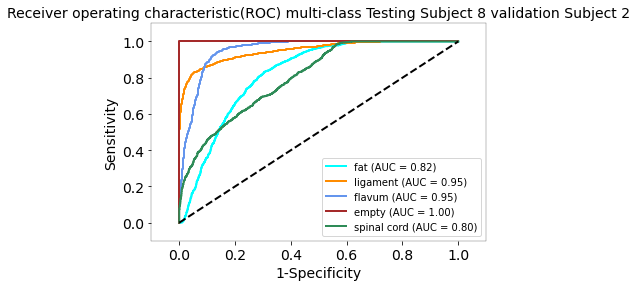

pred_val_K6_outer_k5_val.npy
k_outer =  6
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


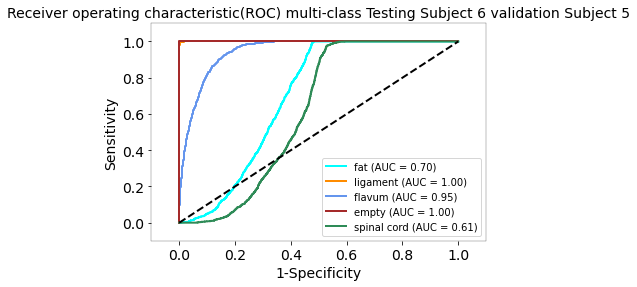

pred_val_K6_outer_k1_val.npy
k_outer =  6
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


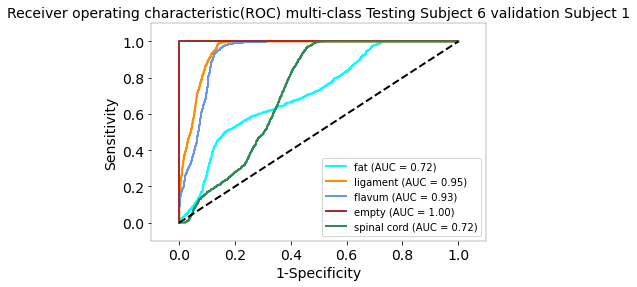

pred_val_K1_outer_k8_val.npy
k_outer =  1
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


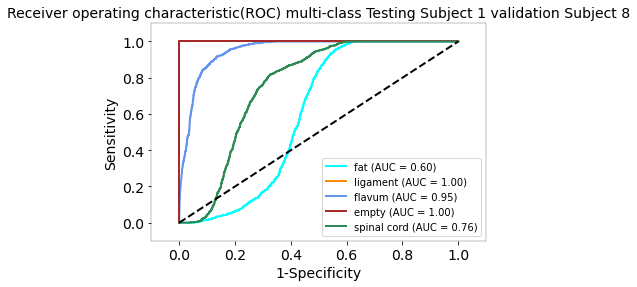

pred_val_K1_outer_k4_val.npy
k_outer =  1
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


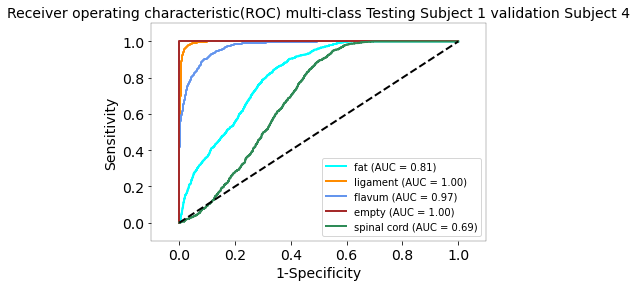

pred_val_K7_outer_k5_val.npy
k_outer =  7
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


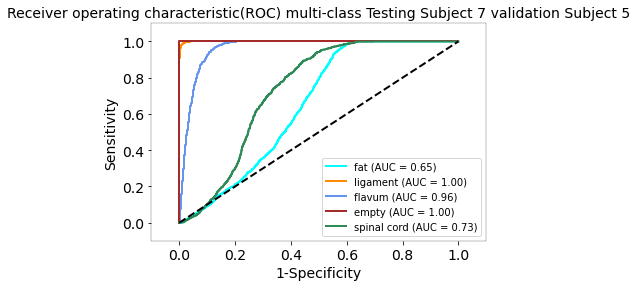

pred_val_K7_outer_k1_val.npy
k_outer =  7
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


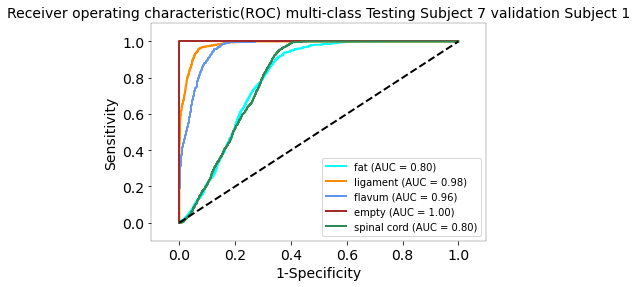

pred_val_K8_outer_k7_val.npy
k_outer =  8
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


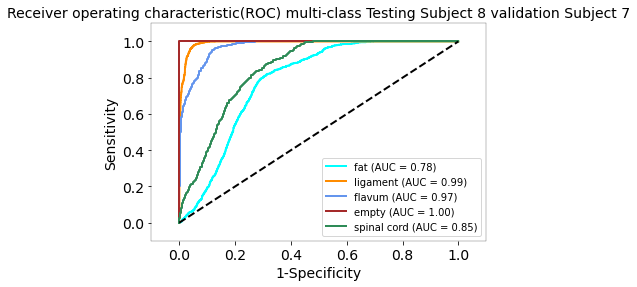

pred_val_K8_outer_k3_val.npy
k_outer =  8
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


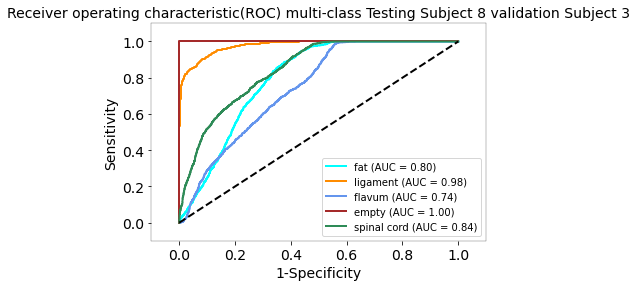

pred_val_K3_outer_k8_val.npy
k_outer =  3
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


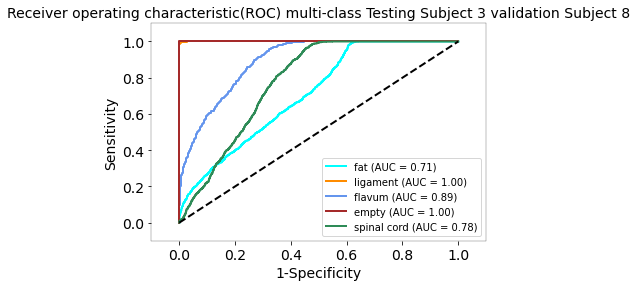

pred_val_K3_outer_k4_val.npy
k_outer =  3
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


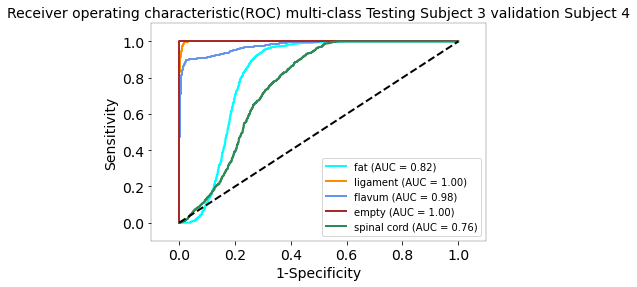

pred_val_K4_outer_k1_val.npy
k_outer =  4
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


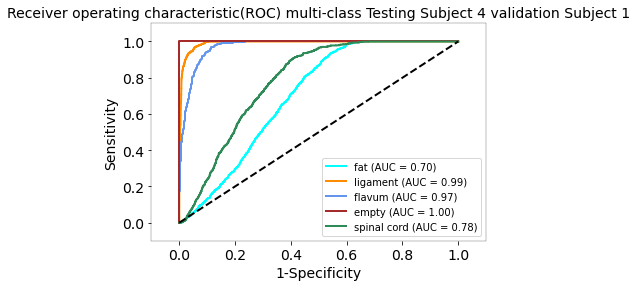

pred_val_K4_outer_k5_val.npy
k_outer =  4
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


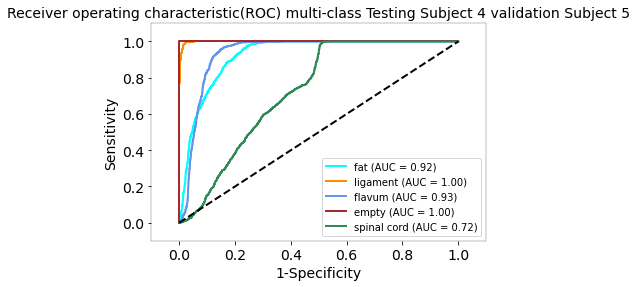

pred_val_K2_outer_k4_val.npy
k_outer =  2
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


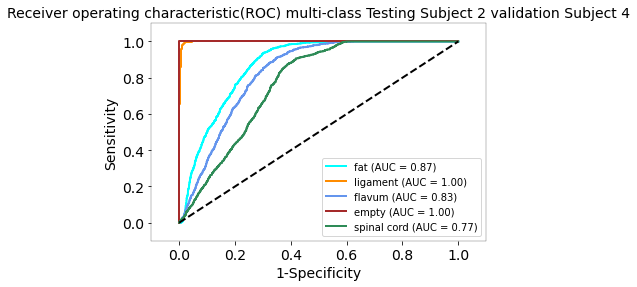

pred_val_K2_outer_k8_val.npy
k_outer =  2
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


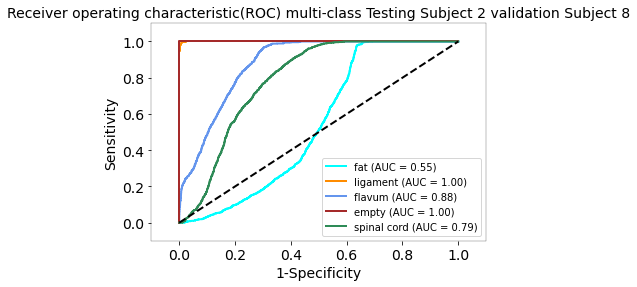

pred_val_K5_outer_k1_val.npy
k_outer =  5
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


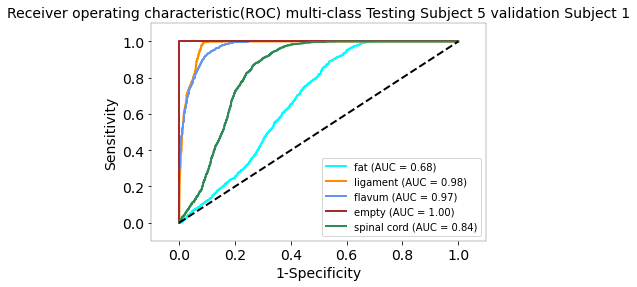

pred_val_K1_outer_k6_val.npy
k_outer =  1
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


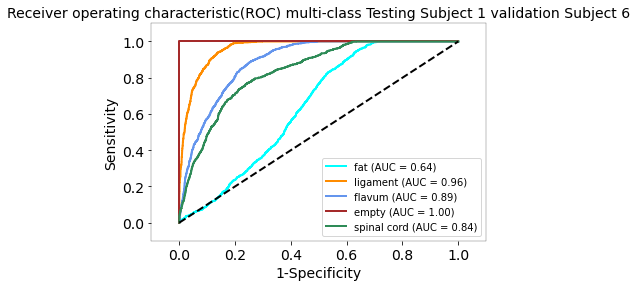

pred_val_K1_outer_k2_val.npy
k_outer =  1
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


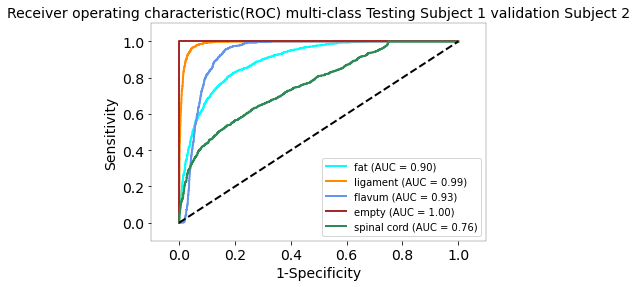

pred_val_K6_outer_k7_val.npy
k_outer =  6
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


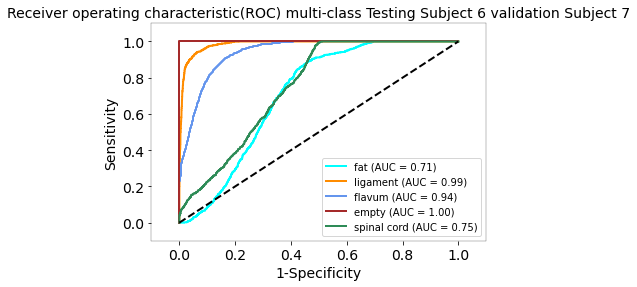

pred_val_K6_outer_k3_val.npy
k_outer =  6
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


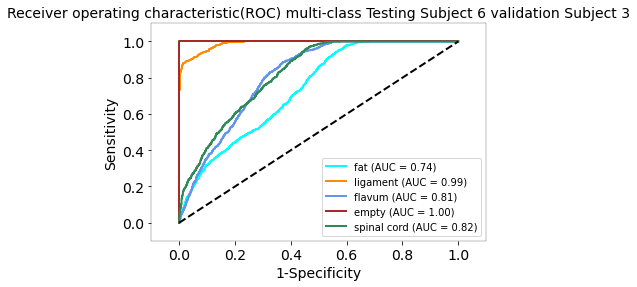

pred_val_K8_outer_k5_val.npy
k_outer =  8
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


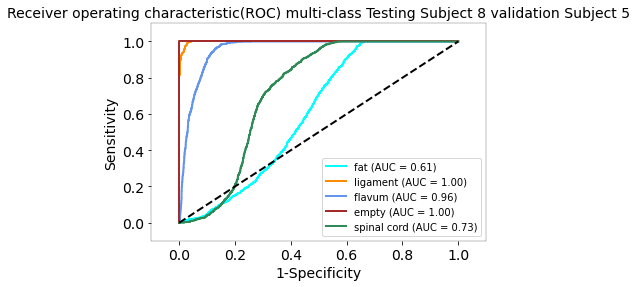

pred_val_K8_outer_k1_val.npy
k_outer =  8
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


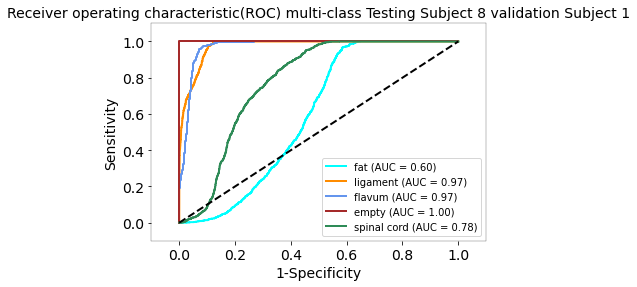

pred_val_K7_outer_k3_val.npy
k_outer =  7
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


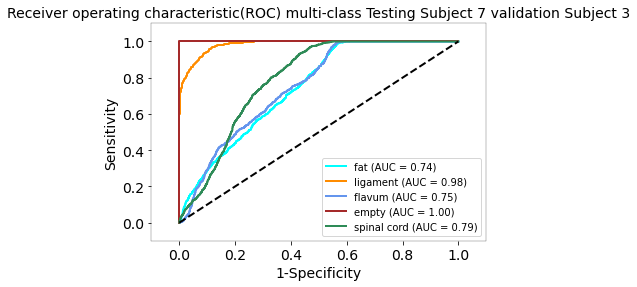

pred_val_K4_outer_k3_val.npy
k_outer =  4
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


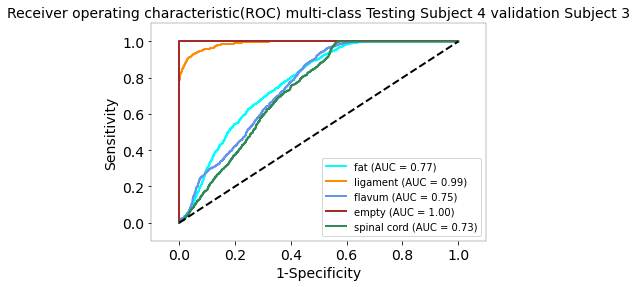

pred_val_K4_outer_k7_val.npy
k_outer =  4
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


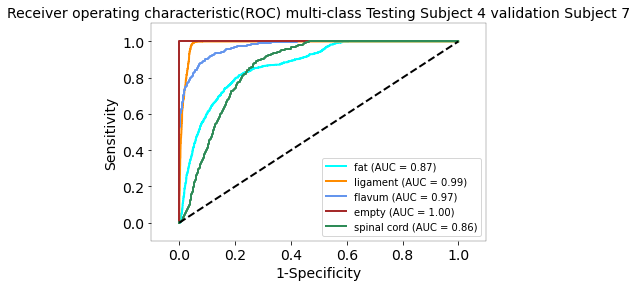

pred_val_K3_outer_k2_val.npy
k_outer =  3
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


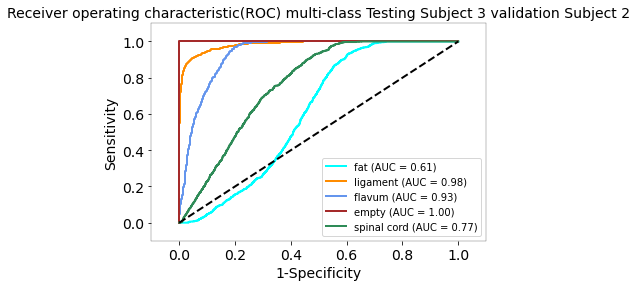

pred_val_K3_outer_k6_val.npy
k_outer =  3
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


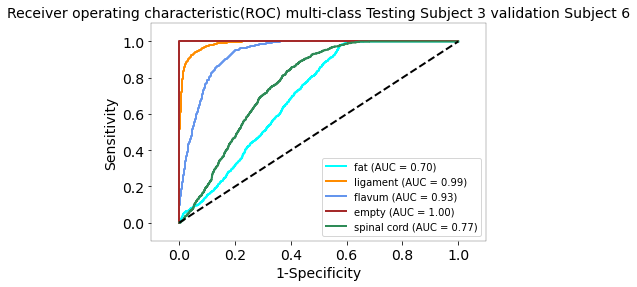

pred_val_K5_outer_k3_val.npy
k_outer =  5
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


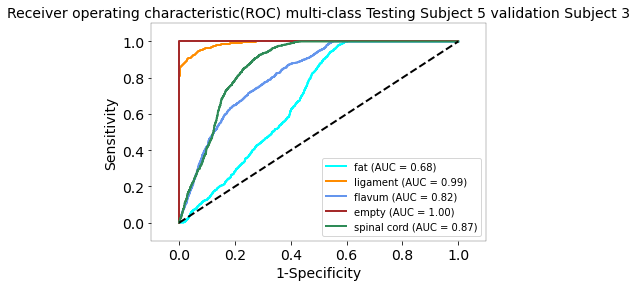

pred_val_K5_outer_k7_val.npy
k_outer =  5
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


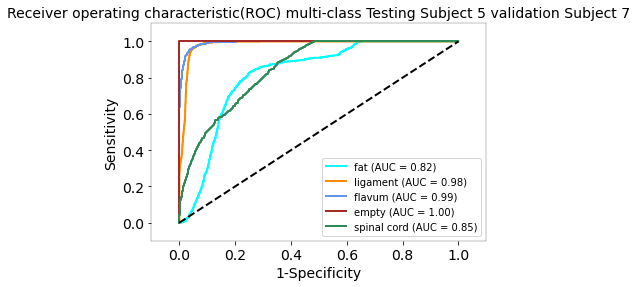

pred_val_K2_outer_k6_val.npy
k_outer =  2
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


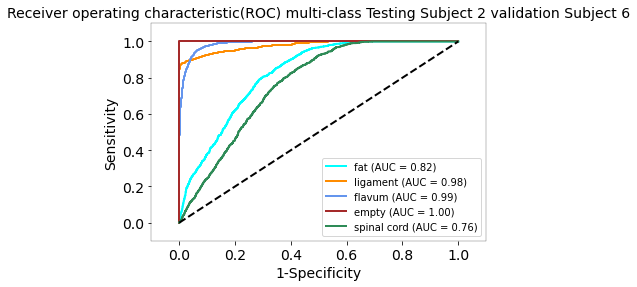

pred_val_K4_outer_k2_val.npy
k_outer =  4
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


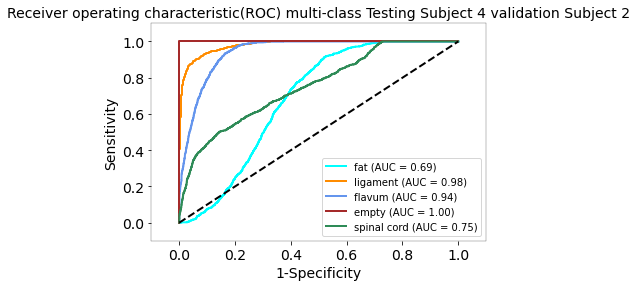

pred_val_K4_outer_k6_val.npy
k_outer =  4
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


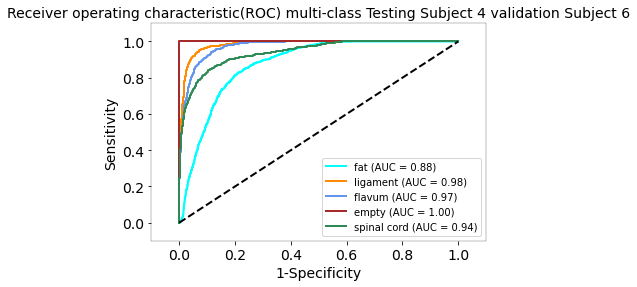

pred_val_K3_outer_k7_val.npy
k_outer =  3
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


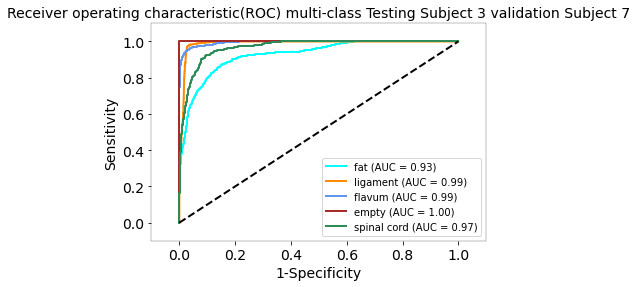

pred_val_K5_outer_k2_val.npy
k_outer =  5
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


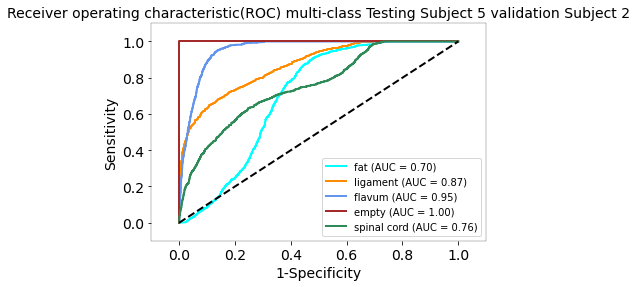

pred_val_K5_outer_k6_val.npy
k_outer =  5
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


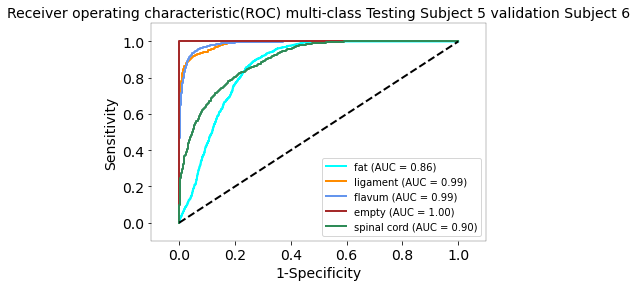

pred_val_K2_outer_k3_val.npy
k_outer =  2
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


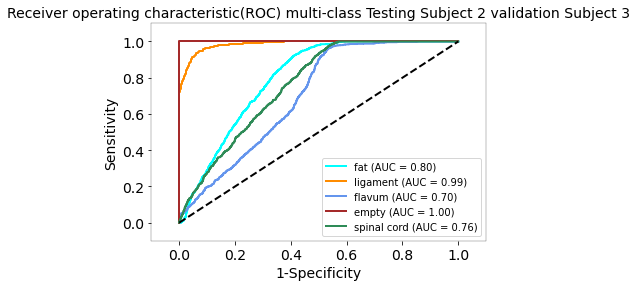

pred_val_K2_outer_k7_val.npy
k_outer =  2
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


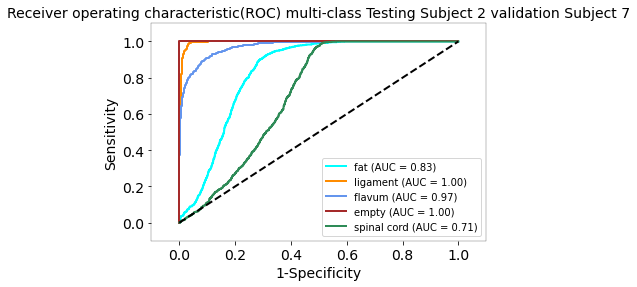

pred_val_K1_outer_k7_val.npy
k_outer =  1
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


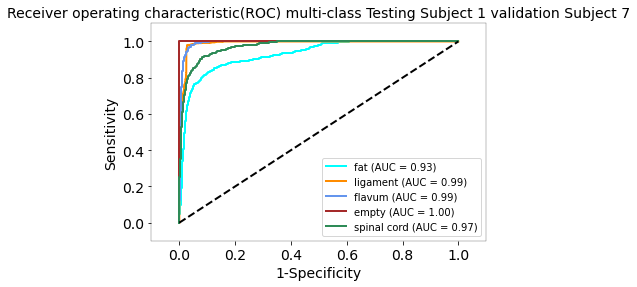

pred_val_K1_outer_k3_val.npy
k_outer =  1
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


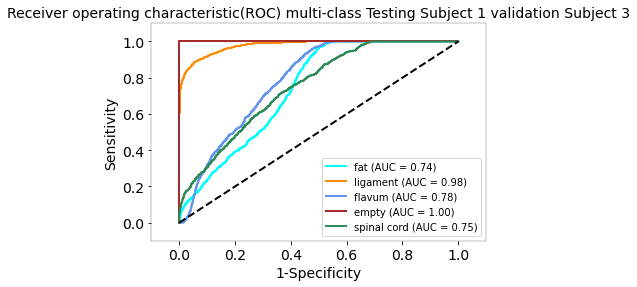

pred_val_K6_outer_k2_val.npy
k_outer =  6
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


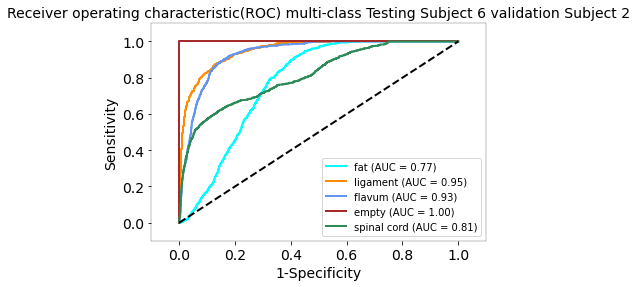

pred_val_K8_outer_k4_val.npy
k_outer =  8
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


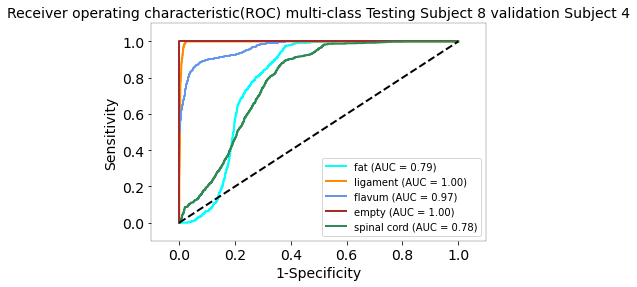

pred_val_K7_outer_k6_val.npy
k_outer =  7
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


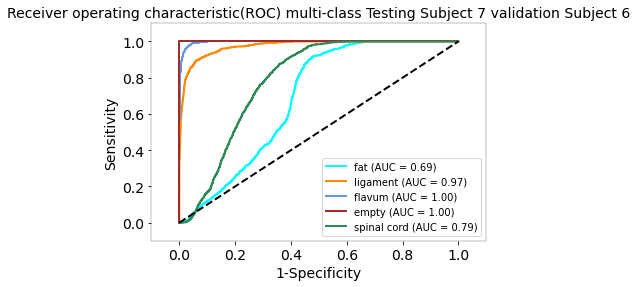

pred_val_K7_outer_k2_val.npy
k_outer =  7
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-300-d97154e0b272>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


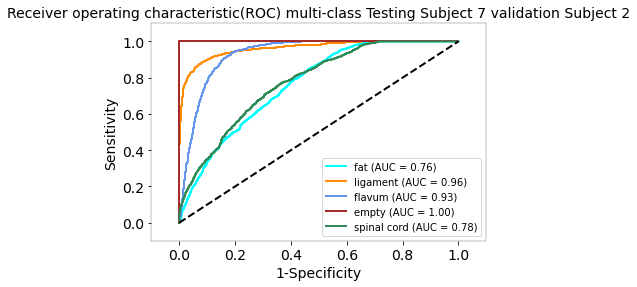

In [300]:
l_prob = []
l_bin = []

for item in l_pred_files:
    print(item)
    # Get outter look
    
    fig, ax = plt.subplots()
        
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
    
    y_val_temp_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])
   
    l_prob.append(prob_temp)
    l_bin.append(y_val_temp_bin)

    n_classes = 5

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_temp_bin[:, i], prob_temp[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val_temp_bin.ravel(), prob_temp.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    # plt.plot(fpr["micro"], tpr["micro"],
    #          label='micro-average (area = {0:0.2f})'
    #                ''.format(roc_auc["micro"]),
    #          color='deeppink', linestyle=':', linewidth=4)

    # plt.plot(fpr["macro"], tpr["macro"],
    #          label='macro-average (area = {0:0.2f})'
    #                ''.format(roc_auc["macro"]),
    #          color='navy', linestyle=':', linewidth=4)

    lw = 2

    l_types = ["fat","ligament","flavum","empty","spinal cord"]

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
    for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='{0} (AUC = {1:0.2f})'
                 ''.format(type_name, roc_auc[i]))

    # for i, type_name in zip([0,1,2,3,4], l_types):
    #     plt.plot(fpr[i], tpr[i], lw=lw,
    #              label='{0} (AUC = {1:0.2f})'
    #              ''.format(type_name, roc_auc[i]))  


    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(0.25)
    ax.spines["bottom"].set_linewidth(0.25)
    ax.spines["left"].set_linewidth(0.25)
    ax.spines["right"].set_linewidth(0.25)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
#     plt.title('Receiver operating characteristic(ROC) Classifier 1 Subject %d'%
#               (k_outer)
    
    plt.title('Receiver operating characteristic(ROC) multi-class Testing Subject %d validation Subject %d'%
              (k_outer,k_val), fontsize=14)
    plt.legend(loc="lower right")
    # plt.savefig("./ROC_tests/ROC_kidney1.jpg", dpi=300)
    plt.savefig("./ROC/Multi-class_validation/ROC_validation_test_S%d_val_S%d.jpg"%(k_outer,k_val),
                dpi=300, bbox_inches='tight')
    
    plt.show()
        
#     break

In [301]:
prob_all = np.concatenate(l_prob)
prob_all.shape

(277900, 5)

In [302]:
y_test_all_bin = np.concatenate(l_bin)
y_test_all_bin.shape

(277900, 5)

In [303]:
len(l_bin)

56

In [304]:
# y_test_K10_bin = label_binarize(y_test_K10, classes=[0, 1, 2])

n_classes = 5

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_all_bin[:, i], prob_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [305]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_all_bin.ravel(), prob_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

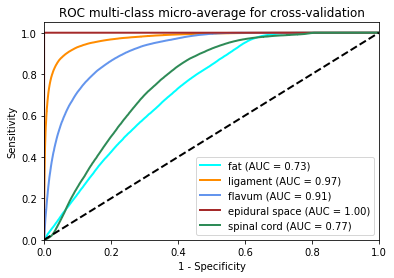

In [306]:
# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average(area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

lw = 2

l_types = ["fat","ligament","flavum","epidural space","spinal cord"]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc[i]))


    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC multi-class micro-average for cross-validation')
plt.legend(loc="lower right")
plt.savefig("./ROC/ROC_5cat_average.jpg", dpi=300)
plt.show()

In [307]:
l_prob = []
l_bin = []

tprs = [[],[],[],[],[]]
aucs = [[],[],[],[],[]]
mean_fpr = np.linspace(0, 1, 100)

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
    
    y_val_temp_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])
   
    l_prob.append(prob_temp)
    l_bin.append(y_val_temp_bin)

    n_classes = 5

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    mean_fpr = np.linspace(0, 1, 100)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_temp_bin[:, i], prob_temp[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        interp_tpr = np.interp(mean_fpr, fpr[i], tpr[i])
        interp_tpr[0] = 0.0
        tprs[i].append(interp_tpr)
        aucs[i].append(roc_auc[i])
        
# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = plot_roc_curve(classifier, X[test], y[test],
#                          name='ROC fold {}'.format(i),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

pred_val_K3_outer_k1_val.npy
k_outer =  3
k_val =  1
a_epidural_num_val =  [1]
pred_val_K3_outer_k5_val.npy
k_outer =  3
k_val =  5
a_epidural_num_val =  [5]
pred_val_K4_outer_k8_val.npy
k_outer =  4
k_val =  8
a_epidural_num_val =  [8]
pred_val_K2_outer_k1_val.npy
k_outer =  2
k_val =  1
a_epidural_num_val =  [1]
pred_val_K2_outer_k5_val.npy
k_outer =  2
k_val =  5
a_epidural_num_val =  [5]
pred_val_K5_outer_k4_val.npy
k_outer =  5
k_val =  4
a_epidural_num_val =  [4]
pred_val_K5_outer_k8_val.npy
k_outer =  5
k_val =  8
a_epidural_num_val =  [8]
pred_val_K6_outer_k8_val.npy
k_outer =  6
k_val =  8
a_epidural_num_val =  [8]
pred_val_K6_outer_k4_val.npy
k_outer =  6
k_val =  4
a_epidural_num_val =  [4]
pred_val_K1_outer_k5_val.npy
k_outer =  1
k_val =  5
a_epidural_num_val =  [5]
pred_val_K7_outer_k4_val.npy
k_outer =  7
k_val =  4
a_epidural_num_val =  [4]
pred_val_K7_outer_k8_val.npy
k_outer =  7
k_val =  8
a_epidural_num_val =  [8]
pred_val_K8_outer_k6_val.npy
k_outer =  8
k_val =  6

In [308]:
a_tprs = np.array(tprs)
print(a_tprs.shape)

a_aucs = np.array(aucs)
print(a_aucs.shape)

np.mean(a_tprs, axis=1).shape

mean_tpr = np.mean(a_tprs, axis=1)
mean_tpr[:,-1] = 1.0
mean_auc = [auc(mean_fpr, i) for i in mean_tpr ]

print(mean_auc)
std_auc = np.std(aucs, axis = 1, ddof=1)/(56**0.5)
print(std_auc)
std_tpr = np.std(a_aucs, axis=1, ddof=1)
print(std_tpr)
tprs_upper = [np.minimum(mean_tpr[i] + std_tpr[i], 1) for i in range(5)]
# print(tprs_upper)
tprs_lower = [np.maximum(mean_tpr[i] - std_tpr[i], 0) for i in range(5)]
# print(tprs_lower)



(5, 56, 100)
(5, 56)
[0.7381860087163117, 0.9809902597402598, 0.9239098852886731, 0.994949494949495, 0.7802135936253901]
[0.01388088 0.00284297 0.00955274 0.         0.01045873]
[0.103875   0.02127481 0.07148618 0.         0.07826594]


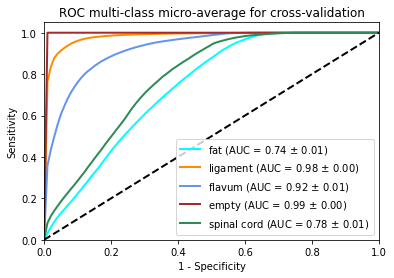

In [309]:
lw = 2

l_types = ["fat","ligament","flavum","empty","spinal cord"]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
    plt.plot(mean_fpr, mean_tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f} $\pm$ {2:0.2f})'
             ''.format(type_name, mean_auc[i],std_auc[i] ))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC multi-class micro-average for cross-validation')
plt.legend(loc="lower right")
plt.savefig("./ROC/ROC_5cat_inter_average.jpg", dpi=300)

# InceptionV3 5cat

## All combinations Confusion Matrix

In [376]:
from sklearn.metrics import confusion_matrix

In [377]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archInceptionV3_5cat_results/"
dirs = os.listdir( path )

In [378]:
dirs

['pred_val_K4_outer_k1_val.npy',
 'history_K7_outer_k1_val.pickle',
 'pred_val_K4_outer_k5_val.npy',
 'time_total_K3_outer_k7_val.npy',
 'history_K3_outer_k8_val.pickle',
 'pred_val_K3_outer_k8_val.npy',
 'history_K8_outer_k2_val.pickle',
 'time_total_K4_outer_k2_val.npy',
 'history_K4_outer_k8_val.pickle',
 'time_total_K4_outer_k6_val.npy',
 'pred_val_K3_outer_k4_val.npy',
 'history_K4_outer_k3_val.pickle',
 'time_total_K2_outer_k3_val.npy',
 'history_K1_outer_k2_val.pickle',
 'pred_val_K5_outer_k1_val.npy',
 'time_total_K2_outer_k7_val.npy',
 'time_total_K5_outer_k2_val.npy',
 'pred_val_K2_outer_k4_val.npy',
 'time_total_K5_outer_k6_val.npy',
 'history_K6_outer_k2_val.pickle',
 'pred_val_K2_outer_k8_val.npy',
 'pred_val_K1_outer_k8_val.npy',
 'pred_val_K1_outer_k4_val.npy',
 'history_K1_outer_k5_val.pickle',
 'time_total_K6_outer_k2_val.npy',
 'pred_val_K6_outer_k5_val.npy',
 'time_total_K1_outer_k7_val.npy',
 'history_K3_outer_k4_val.pickle',
 'pred_val_K6_outer_k1_val.npy',
 'time_

In [379]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [380]:
l_pred_files

['pred_val_K4_outer_k1_val.npy',
 'pred_val_K4_outer_k5_val.npy',
 'pred_val_K3_outer_k8_val.npy',
 'pred_val_K3_outer_k4_val.npy',
 'pred_val_K5_outer_k1_val.npy',
 'pred_val_K2_outer_k4_val.npy',
 'pred_val_K2_outer_k8_val.npy',
 'pred_val_K1_outer_k8_val.npy',
 'pred_val_K1_outer_k4_val.npy',
 'pred_val_K6_outer_k5_val.npy',
 'pred_val_K6_outer_k1_val.npy',
 'pred_val_K8_outer_k7_val.npy',
 'pred_val_K8_outer_k3_val.npy',
 'pred_val_K7_outer_k5_val.npy',
 'pred_val_K7_outer_k1_val.npy',
 'pred_val_K1_outer_k5_val.npy',
 'pred_val_K6_outer_k8_val.npy',
 'pred_val_K6_outer_k4_val.npy',
 'pred_val_K8_outer_k6_val.npy',
 'pred_val_K8_outer_k2_val.npy',
 'pred_val_K7_outer_k4_val.npy',
 'pred_val_K7_outer_k8_val.npy',
 'pred_val_K4_outer_k8_val.npy',
 'pred_val_K3_outer_k1_val.npy',
 'pred_val_K3_outer_k5_val.npy',
 'pred_val_K5_outer_k4_val.npy',
 'pred_val_K5_outer_k8_val.npy',
 'pred_val_K2_outer_k1_val.npy',
 'pred_val_K2_outer_k5_val.npy',
 'pred_val_K6_outer_k2_val.npy',
 'pred_val

In [381]:
l_conf = []

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archInceptionV3_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_val, pred_temp))
    
    np.savetxt('confusion_matrix_validation_inceptionv3_5cat/Confusion_matrix_K%s_outer_k%s.csv'%(k_outer, k_val), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
    if k_val != 7:
        l_conf.append(temp_conf)

pred_val_K4_outer_k1_val.npy
k_outer =  4
k_val =  1
a_epidural_num_val =  [1]
pred_val_K4_outer_k5_val.npy
k_outer =  4
k_val =  5
a_epidural_num_val =  [5]
pred_val_K3_outer_k8_val.npy
k_outer =  3
k_val =  8
a_epidural_num_val =  [8]
pred_val_K3_outer_k4_val.npy
k_outer =  3
k_val =  4
a_epidural_num_val =  [4]
pred_val_K5_outer_k1_val.npy
k_outer =  5
k_val =  1
a_epidural_num_val =  [1]
pred_val_K2_outer_k4_val.npy
k_outer =  2
k_val =  4
a_epidural_num_val =  [4]
pred_val_K2_outer_k8_val.npy
k_outer =  2
k_val =  8
a_epidural_num_val =  [8]
pred_val_K1_outer_k8_val.npy
k_outer =  1
k_val =  8
a_epidural_num_val =  [8]
pred_val_K1_outer_k4_val.npy
k_outer =  1
k_val =  4
a_epidural_num_val =  [4]
pred_val_K6_outer_k5_val.npy
k_outer =  6
k_val =  5
a_epidural_num_val =  [5]
pred_val_K6_outer_k1_val.npy
k_outer =  6
k_val =  1
a_epidural_num_val =  [1]
pred_val_K8_outer_k7_val.npy
k_outer =  8
k_val =  7
a_epidural_num_val =  [7]
pred_val_K8_outer_k3_val.npy
k_outer =  8
k_val =  3

In [316]:
a_conf = np.stack(l_conf)
a_conf.shape

(49, 5, 5)

In [317]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('Confusion_matrix_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[3.30000000e+02 1.07632653e+02 1.03224490e+02 0.00000000e+00
  4.59142857e+02]
 [1.15673469e+02 8.58469388e+02 2.10204082e+00 2.65306122e-01
  2.34897959e+01]
 [1.60857143e+02 1.14693878e+01 6.75081633e+02 0.00000000e+00
  1.52591837e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+03
  0.00000000e+00]
 [3.30734694e+02 5.00612245e+01 2.15102041e+02 0.00000000e+00
  4.04102041e+02]]


In [318]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('Confusion_matrix_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[34.22180633 17.55272165 16.5939142   0.         39.09876003]
 [23.89441909 23.54065669  0.74160294  0.26258496  3.85764196]
 [25.60787832  3.80710465 39.80360822  0.         22.03402991]
 [ 0.          0.          0.          0.          0.        ]
 [27.61632134  8.03140484 24.2074755   0.         30.46316413]]


In [36]:
int(k_val)

5

In [37]:
temp_conf

array([[   0,    0,    0,    0, 1000],
       [   0,  936,    0,    0,   64],
       [   0,    0,  936,    0,   64],
       [   0,    0,    0, 1000,    0],
       [  80,   23,  589,    0,  308]])

In [38]:
y_val.shape

(5000,)

In [39]:
pred_temp.shape

(5000,)

## All individuals ROC

In [319]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archInceptionV3_5cat_results/"
dirs = os.listdir( path )

In [320]:
dirs

['pred_val_K4_outer_k1_val.npy',
 'history_K7_outer_k1_val.pickle',
 'pred_val_K4_outer_k5_val.npy',
 'time_total_K3_outer_k7_val.npy',
 'history_K3_outer_k8_val.pickle',
 'pred_val_K3_outer_k8_val.npy',
 'history_K8_outer_k2_val.pickle',
 'time_total_K4_outer_k2_val.npy',
 'history_K4_outer_k8_val.pickle',
 'time_total_K4_outer_k6_val.npy',
 'pred_val_K3_outer_k4_val.npy',
 'history_K4_outer_k3_val.pickle',
 'time_total_K2_outer_k3_val.npy',
 'history_K1_outer_k2_val.pickle',
 'pred_val_K5_outer_k1_val.npy',
 'time_total_K2_outer_k7_val.npy',
 'time_total_K5_outer_k2_val.npy',
 'pred_val_K2_outer_k4_val.npy',
 'time_total_K5_outer_k6_val.npy',
 'history_K6_outer_k2_val.pickle',
 'pred_val_K2_outer_k8_val.npy',
 'pred_val_K1_outer_k8_val.npy',
 'pred_val_K1_outer_k4_val.npy',
 'history_K1_outer_k5_val.pickle',
 'time_total_K6_outer_k2_val.npy',
 'pred_val_K6_outer_k5_val.npy',
 'time_total_K1_outer_k7_val.npy',
 'history_K3_outer_k4_val.pickle',
 'pred_val_K6_outer_k1_val.npy',
 'time_

In [321]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [322]:
l_pred_files

['pred_val_K4_outer_k1_val.npy',
 'pred_val_K4_outer_k5_val.npy',
 'pred_val_K3_outer_k8_val.npy',
 'pred_val_K3_outer_k4_val.npy',
 'pred_val_K5_outer_k1_val.npy',
 'pred_val_K2_outer_k4_val.npy',
 'pred_val_K2_outer_k8_val.npy',
 'pred_val_K1_outer_k8_val.npy',
 'pred_val_K1_outer_k4_val.npy',
 'pred_val_K6_outer_k5_val.npy',
 'pred_val_K6_outer_k1_val.npy',
 'pred_val_K8_outer_k7_val.npy',
 'pred_val_K8_outer_k3_val.npy',
 'pred_val_K7_outer_k5_val.npy',
 'pred_val_K7_outer_k1_val.npy',
 'pred_val_K1_outer_k5_val.npy',
 'pred_val_K6_outer_k8_val.npy',
 'pred_val_K6_outer_k4_val.npy',
 'pred_val_K8_outer_k6_val.npy',
 'pred_val_K8_outer_k2_val.npy',
 'pred_val_K7_outer_k4_val.npy',
 'pred_val_K7_outer_k8_val.npy',
 'pred_val_K4_outer_k8_val.npy',
 'pred_val_K3_outer_k1_val.npy',
 'pred_val_K3_outer_k5_val.npy',
 'pred_val_K5_outer_k4_val.npy',
 'pred_val_K5_outer_k8_val.npy',
 'pred_val_K2_outer_k1_val.npy',
 'pred_val_K2_outer_k5_val.npy',
 'pred_val_K6_outer_k2_val.npy',
 'pred_val

pred_val_K4_outer_k1_val.npy
k_outer =  4
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


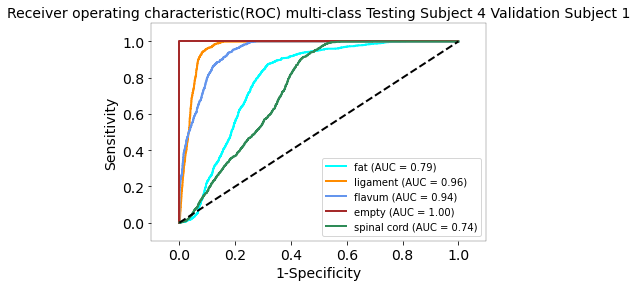

pred_val_K4_outer_k5_val.npy
k_outer =  4
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


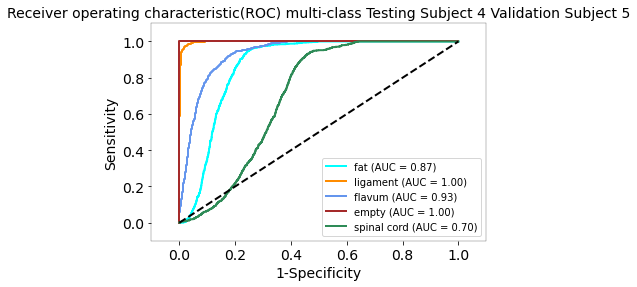

pred_val_K3_outer_k8_val.npy
k_outer =  3
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


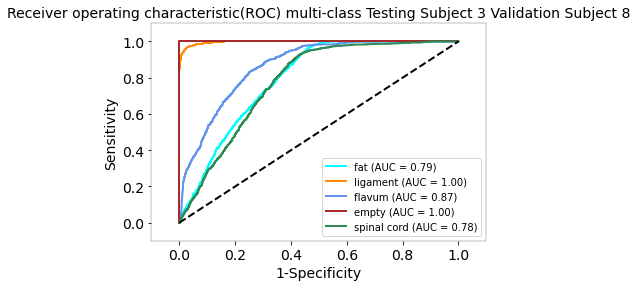

pred_val_K3_outer_k4_val.npy
k_outer =  3
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


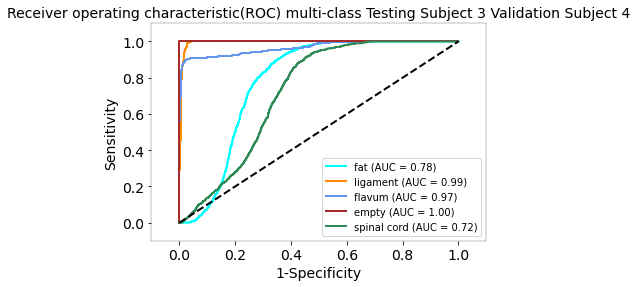

pred_val_K5_outer_k1_val.npy
k_outer =  5
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


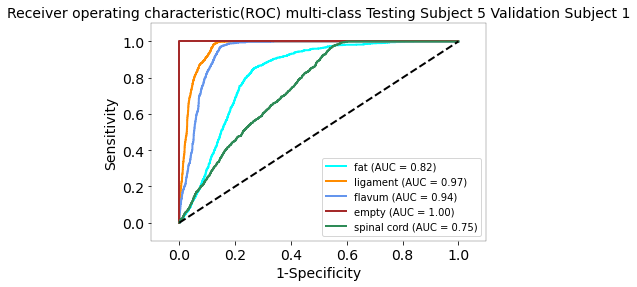

pred_val_K2_outer_k4_val.npy
k_outer =  2
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


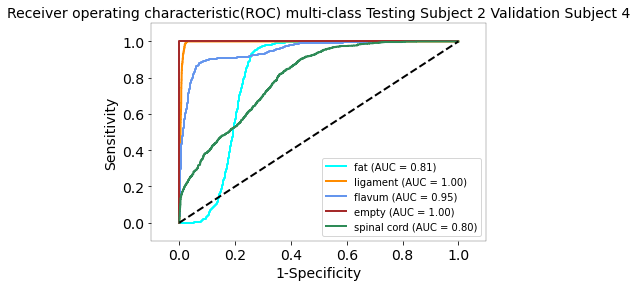

pred_val_K2_outer_k8_val.npy
k_outer =  2
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


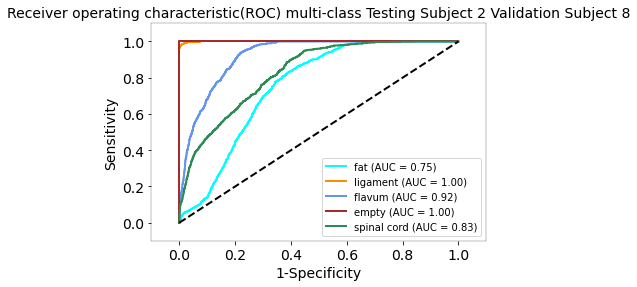

pred_val_K1_outer_k8_val.npy
k_outer =  1
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


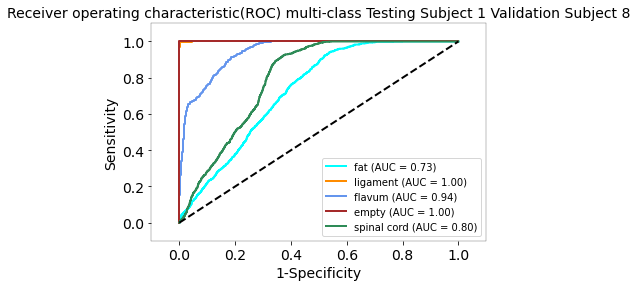

pred_val_K1_outer_k4_val.npy
k_outer =  1
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


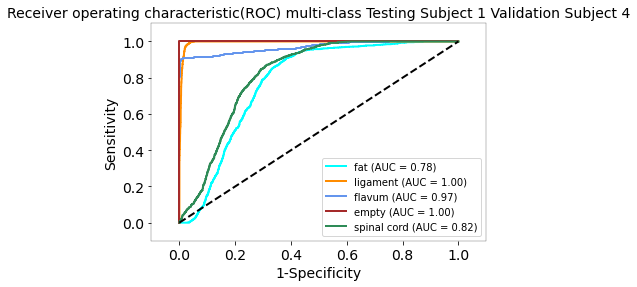

pred_val_K6_outer_k5_val.npy
k_outer =  6
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


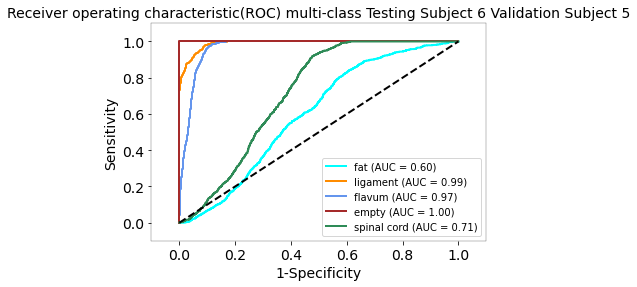

pred_val_K6_outer_k1_val.npy
k_outer =  6
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


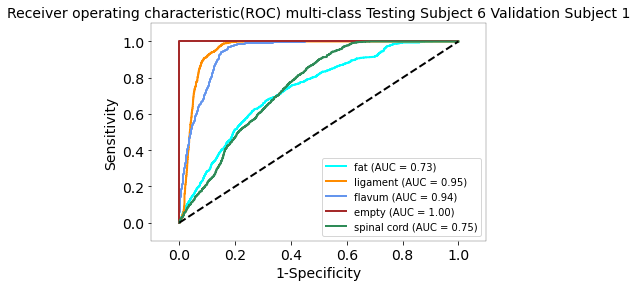

pred_val_K8_outer_k7_val.npy
k_outer =  8
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


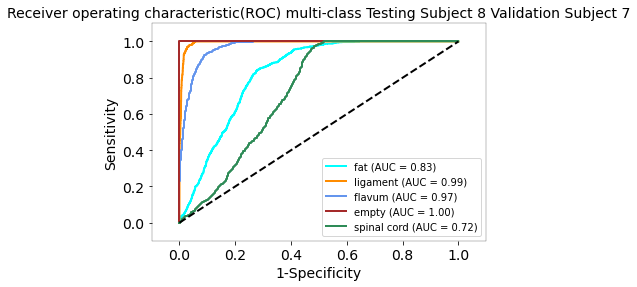

pred_val_K8_outer_k3_val.npy
k_outer =  8
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


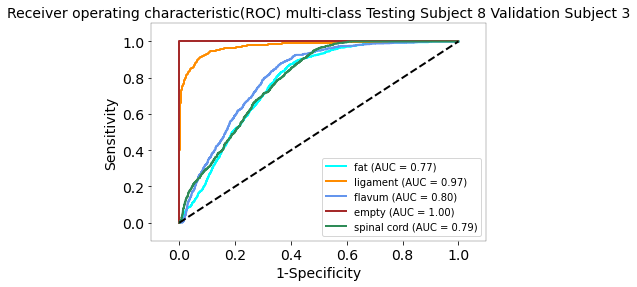

pred_val_K7_outer_k5_val.npy
k_outer =  7
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


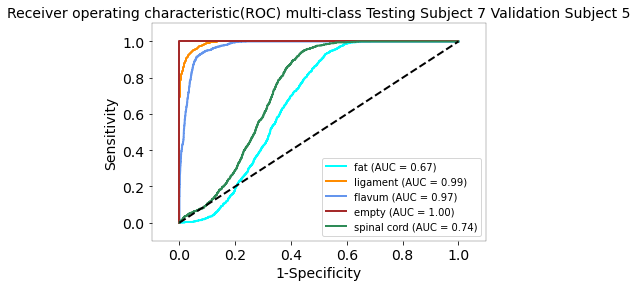

pred_val_K7_outer_k1_val.npy
k_outer =  7
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


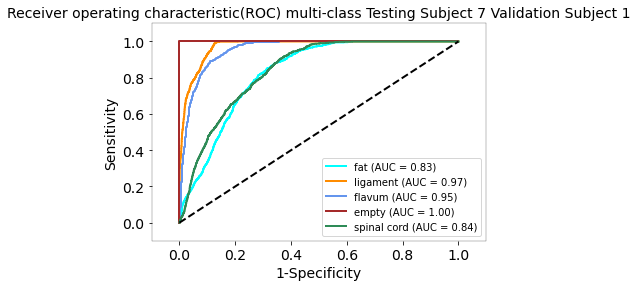

pred_val_K1_outer_k5_val.npy
k_outer =  1
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


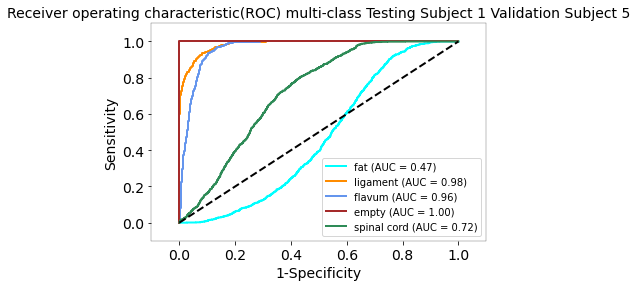

pred_val_K6_outer_k8_val.npy
k_outer =  6
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


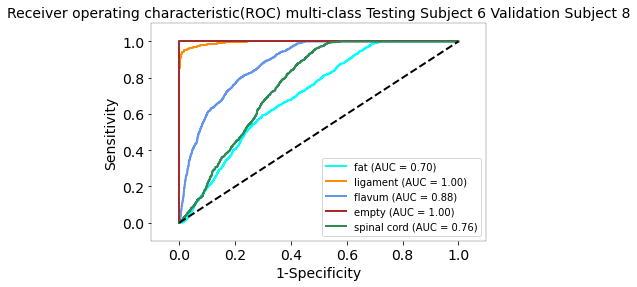

pred_val_K6_outer_k4_val.npy
k_outer =  6
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


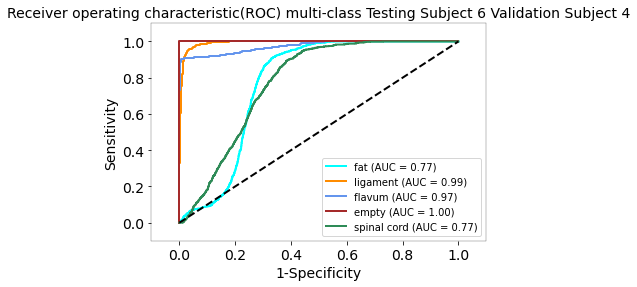

pred_val_K8_outer_k6_val.npy
k_outer =  8
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


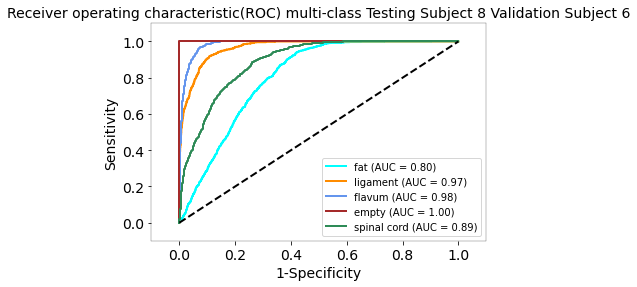

pred_val_K8_outer_k2_val.npy
k_outer =  8
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


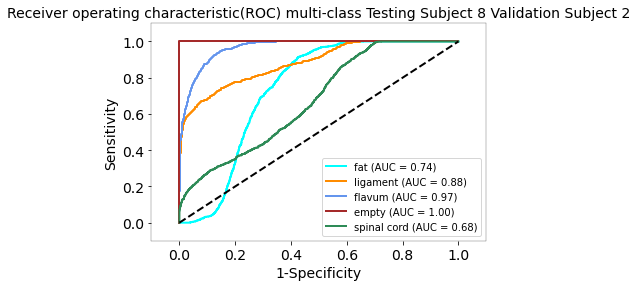

pred_val_K7_outer_k4_val.npy
k_outer =  7
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


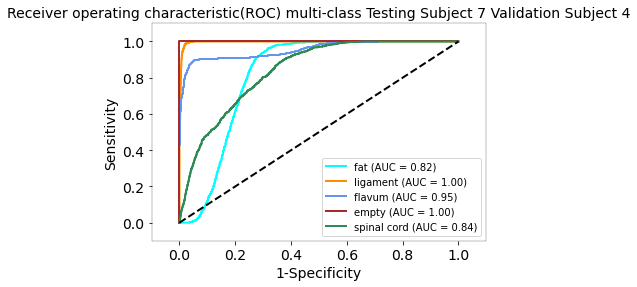

pred_val_K7_outer_k8_val.npy
k_outer =  7
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


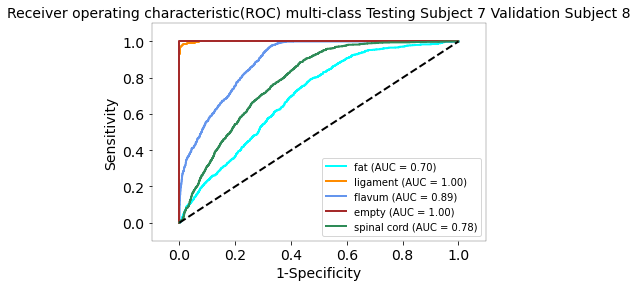

pred_val_K4_outer_k8_val.npy
k_outer =  4
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


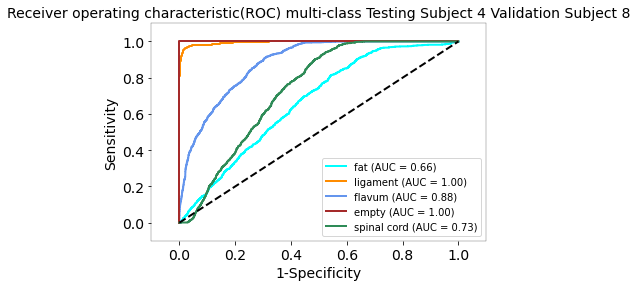

pred_val_K3_outer_k1_val.npy
k_outer =  3
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


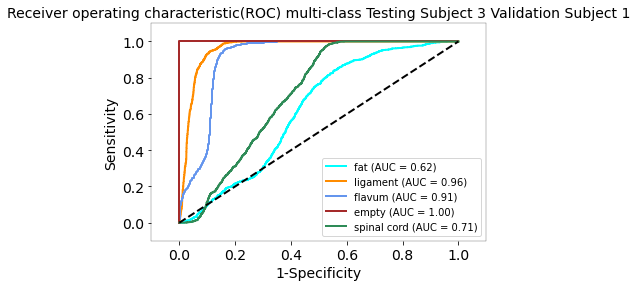

pred_val_K3_outer_k5_val.npy
k_outer =  3
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


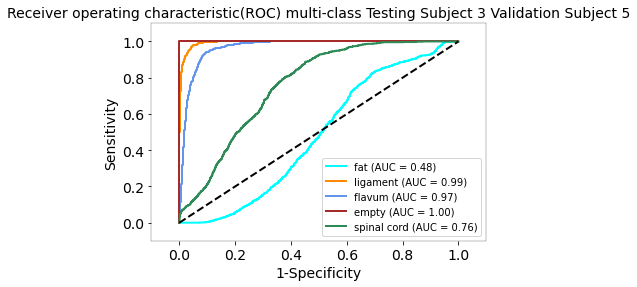

pred_val_K5_outer_k4_val.npy
k_outer =  5
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


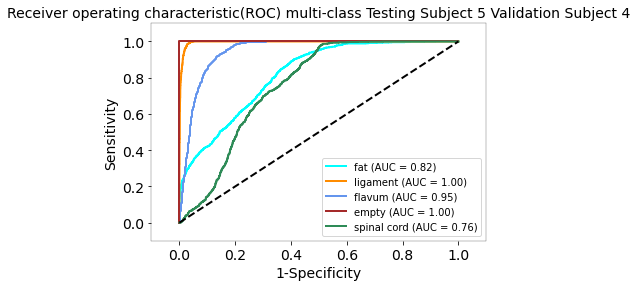

pred_val_K5_outer_k8_val.npy
k_outer =  5
k_val =  8
a_epidural_num_val =  [8]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


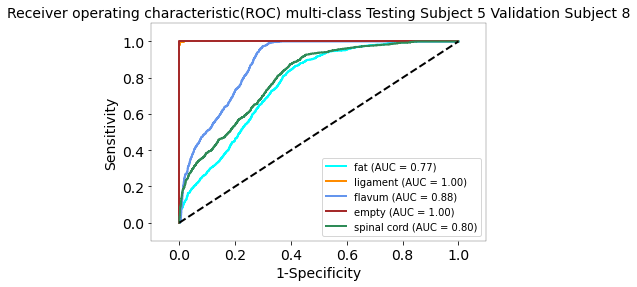

pred_val_K2_outer_k1_val.npy
k_outer =  2
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


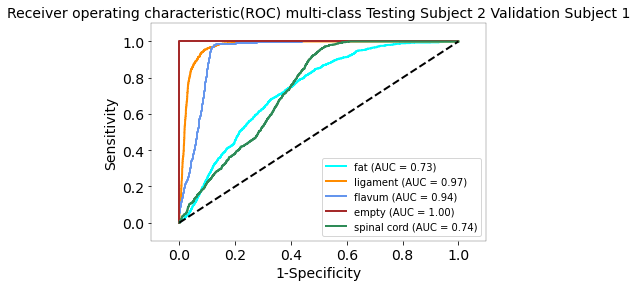

pred_val_K2_outer_k5_val.npy
k_outer =  2
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


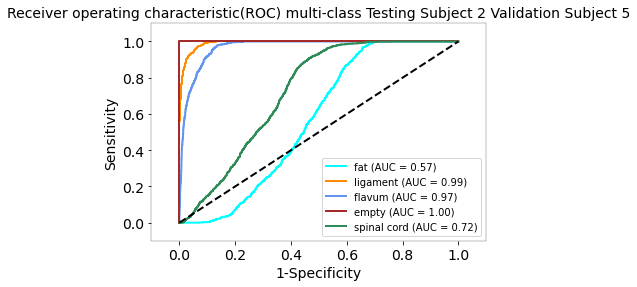

pred_val_K6_outer_k2_val.npy
k_outer =  6
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


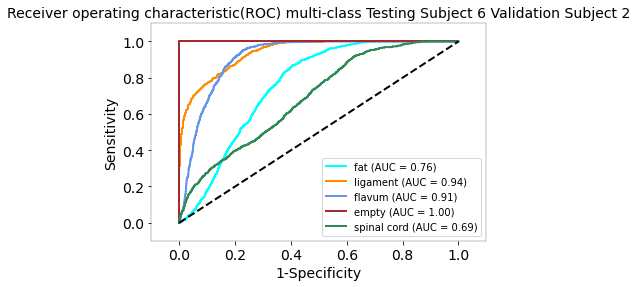

pred_val_K1_outer_k7_val.npy
k_outer =  1
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


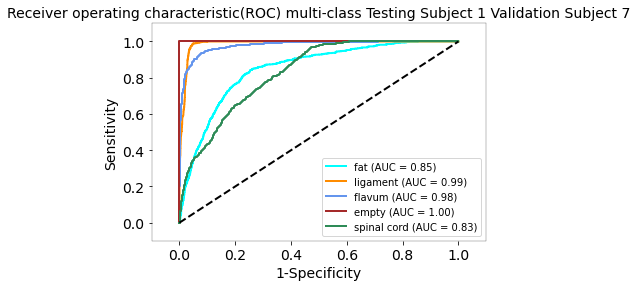

pred_val_K1_outer_k3_val.npy
k_outer =  1
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


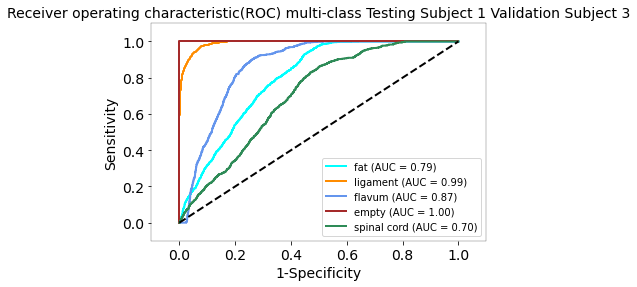

pred_val_K7_outer_k6_val.npy
k_outer =  7
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


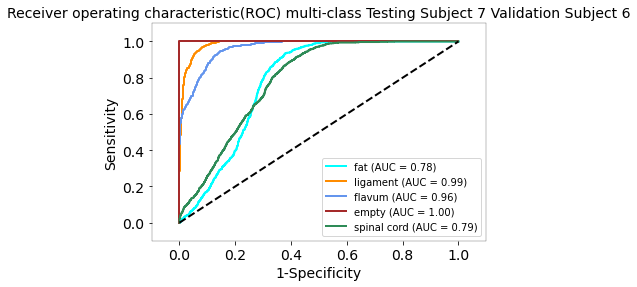

pred_val_K7_outer_k2_val.npy
k_outer =  7
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


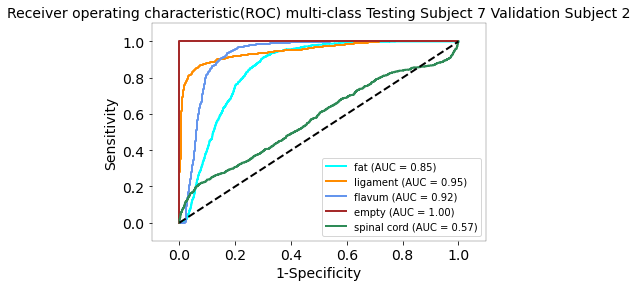

pred_val_K8_outer_k4_val.npy
k_outer =  8
k_val =  4
a_epidural_num_val =  [4]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


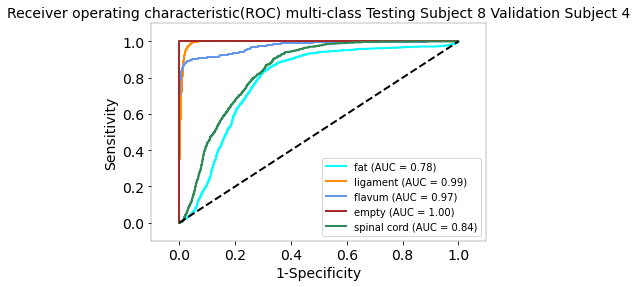

pred_val_K3_outer_k7_val.npy
k_outer =  3
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


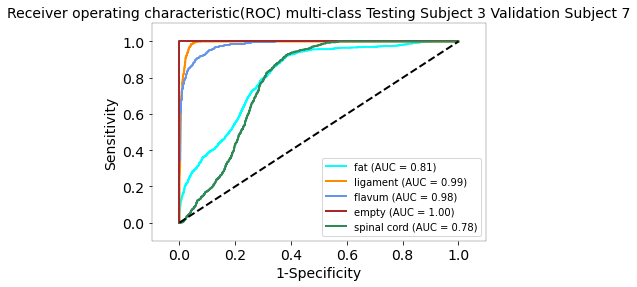

pred_val_K4_outer_k2_val.npy
k_outer =  4
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


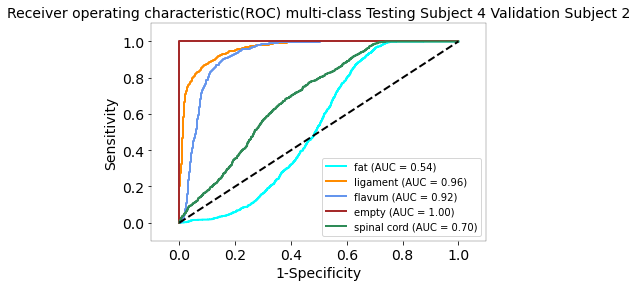

pred_val_K4_outer_k6_val.npy
k_outer =  4
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


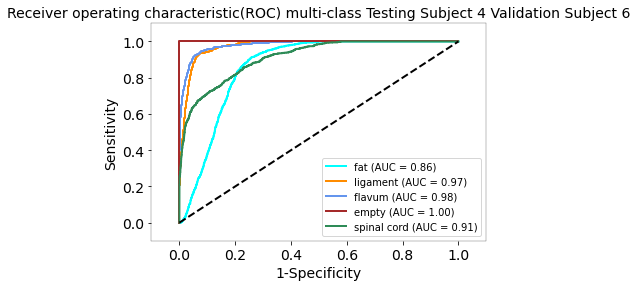

pred_val_K2_outer_k3_val.npy
k_outer =  2
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


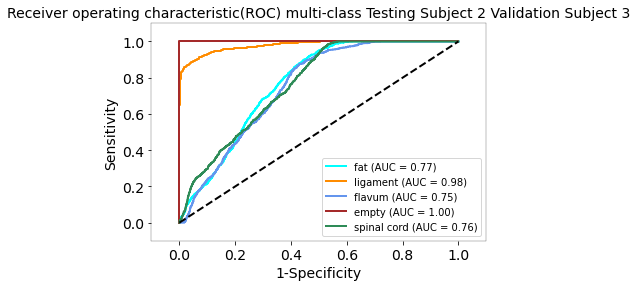

pred_val_K2_outer_k7_val.npy
k_outer =  2
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


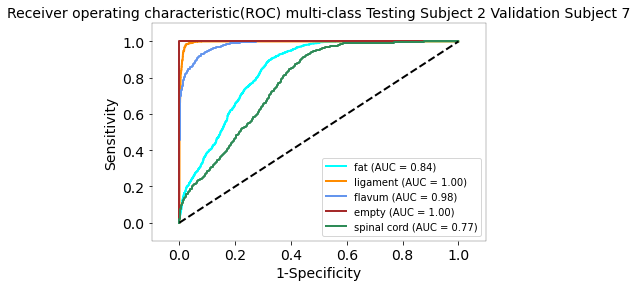

pred_val_K5_outer_k2_val.npy
k_outer =  5
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


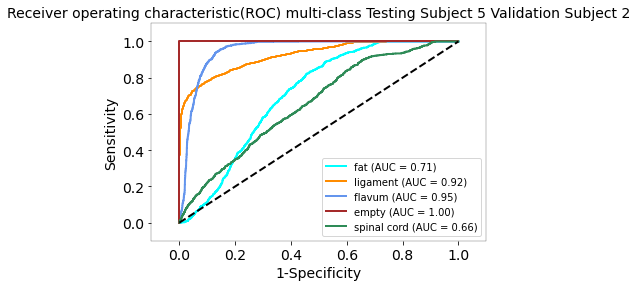

pred_val_K5_outer_k6_val.npy
k_outer =  5
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


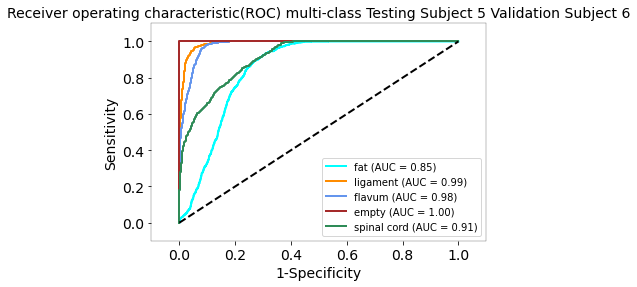

pred_val_K3_outer_k2_val.npy
k_outer =  3
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


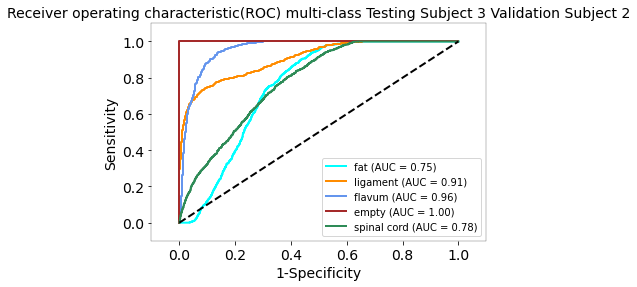

pred_val_K3_outer_k6_val.npy
k_outer =  3
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


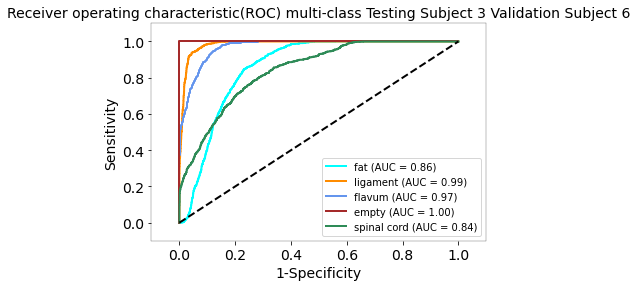

pred_val_K4_outer_k3_val.npy
k_outer =  4
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


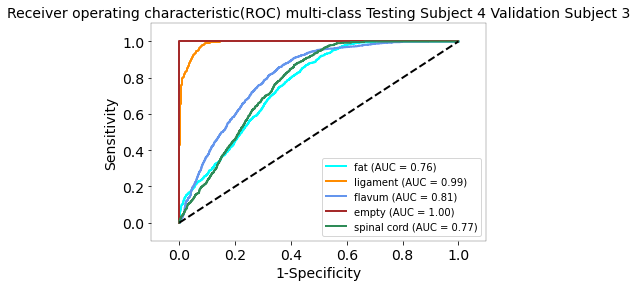

pred_val_K4_outer_k7_val.npy
k_outer =  4
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


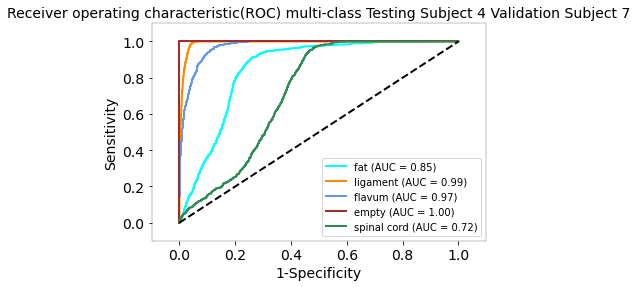

pred_val_K2_outer_k6_val.npy
k_outer =  2
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


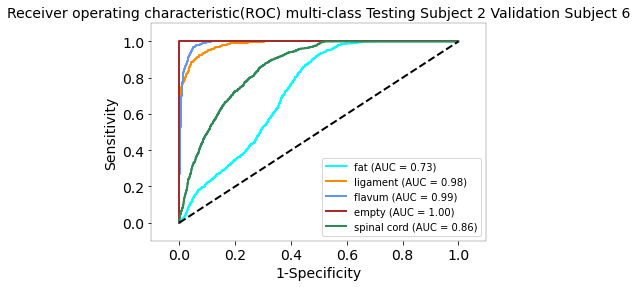

pred_val_K5_outer_k3_val.npy
k_outer =  5
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


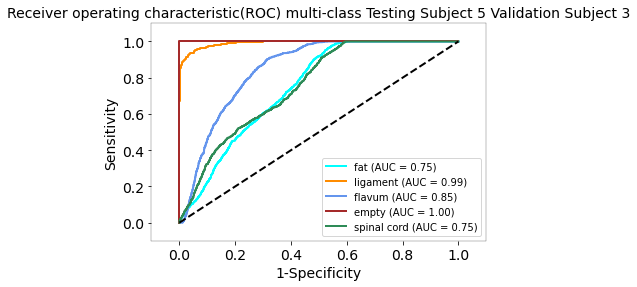

pred_val_K5_outer_k7_val.npy
k_outer =  5
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


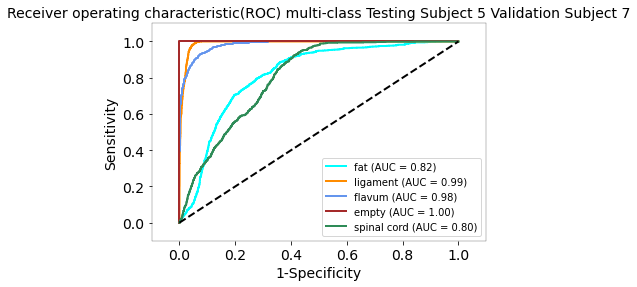

pred_val_K6_outer_k7_val.npy
k_outer =  6
k_val =  7
a_epidural_num_val =  [7]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


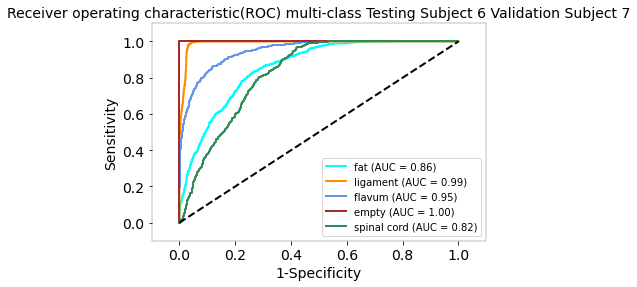

pred_val_K6_outer_k3_val.npy
k_outer =  6
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


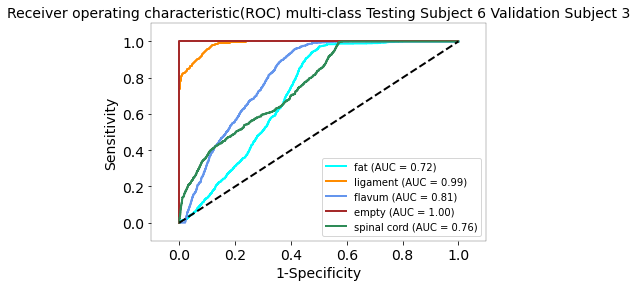

pred_val_K1_outer_k6_val.npy
k_outer =  1
k_val =  6
a_epidural_num_val =  [6]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


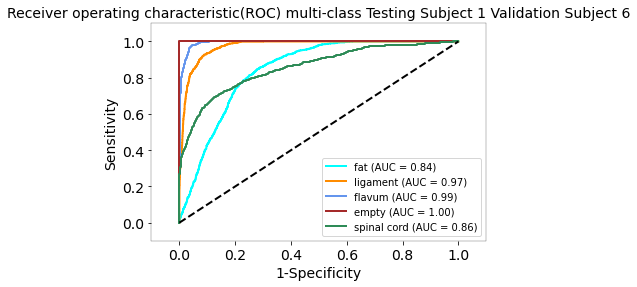

pred_val_K1_outer_k2_val.npy
k_outer =  1
k_val =  2
a_epidural_num_val =  [2]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


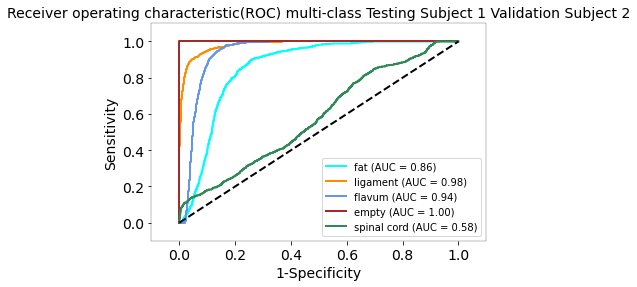

pred_val_K7_outer_k3_val.npy
k_outer =  7
k_val =  3
a_epidural_num_val =  [3]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


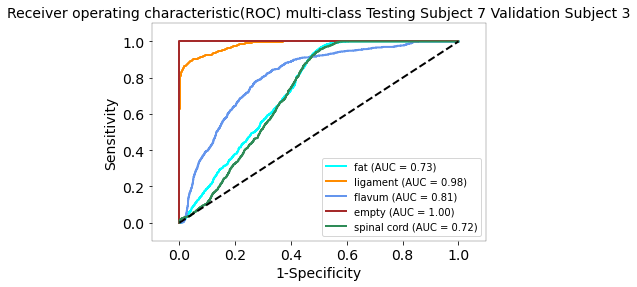

pred_val_K8_outer_k5_val.npy
k_outer =  8
k_val =  5
a_epidural_num_val =  [5]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


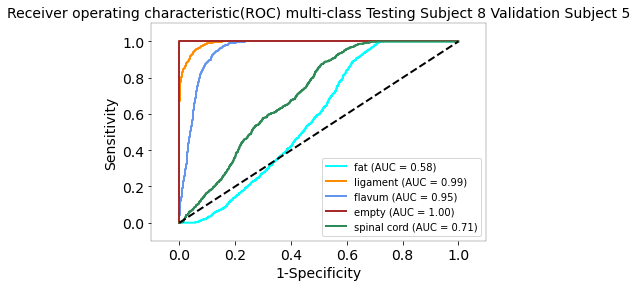

pred_val_K8_outer_k1_val.npy
k_outer =  8
k_val =  1
a_epidural_num_val =  [1]


<ipython-input-325-abaa0825815c>:71: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


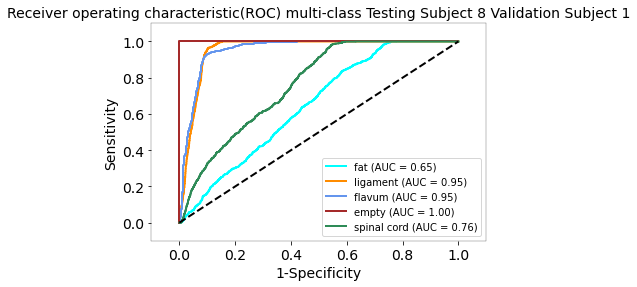

In [325]:
l_prob = []
l_bin = []

for item in l_pred_files:
    print(item)
    # Get outter look
    
    fig, ax = plt.subplots()
    
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archInceptionV3_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
    
    y_val_temp_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])
   
    l_prob.append(prob_temp)
    l_bin.append(y_val_temp_bin)

    n_classes = 5

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_temp_bin[:, i], prob_temp[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_val_temp_bin.ravel(), prob_temp.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])    

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    # plt.figure()
    # plt.plot(fpr["micro"], tpr["micro"],
    #          label='micro-average (area = {0:0.2f})'
    #                ''.format(roc_auc["micro"]),
    #          color='deeppink', linestyle=':', linewidth=4)

    # plt.plot(fpr["macro"], tpr["macro"],
    #          label='macro-average (area = {0:0.2f})'
    #                ''.format(roc_auc["macro"]),
    #          color='navy', linestyle=':', linewidth=4)

    lw = 2

    l_types = ["fat","ligament","flavum","empty","spinal cord"]

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
    for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='{0} (AUC = {1:0.2f})'
                 ''.format(type_name, roc_auc[i]))

    # for i, type_name in zip([0,1,2,3,4], l_types):
    #     plt.plot(fpr[i], tpr[i], lw=lw,
    #              label='{0} (AUC = {1:0.2f})'
    #              ''.format(type_name, roc_auc[i]))  


    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(0.25)
    ax.spines["bottom"].set_linewidth(0.25)
    ax.spines["left"].set_linewidth(0.25)
    ax.spines["right"].set_linewidth(0.25)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    plt.title('Receiver operating characteristic(ROC) multi-class Testing Subject %d Validation Subject %d'%
              (k_outer,k_val), fontsize = 14)
    plt.legend(loc="lower right")
    # plt.savefig("./ROC_tests/ROC_kidney1.jpg", dpi=300)
    
    plt.savefig("./ROC/Multi-class_validation/ROC_validation_inceptionv3_test_S%d_val_S%d.jpg"%(k_outer,k_val),
                dpi=300, bbox_inches='tight')
    
    plt.show()
        
#     break

In [326]:
prob_all = np.concatenate(l_prob)
prob_all.shape

(277900, 5)

In [327]:
y_test_all_bin = np.concatenate(l_bin)
y_test_all_bin.shape

(277900, 5)

In [328]:
len(l_bin)

56

In [329]:
# y_test_K10_bin = label_binarize(y_test_K10, classes=[0, 1, 2])

n_classes = 5

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_all_bin[:, i], prob_all[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [330]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_all_bin.ravel(), prob_all.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

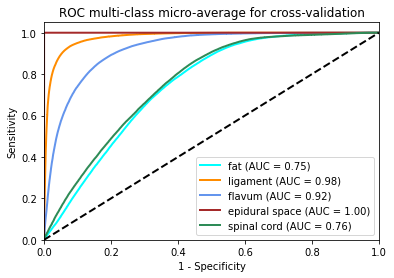

In [331]:
# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average(area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

lw = 2

l_types = ["fat","ligament","flavum","epidural space","spinal cord"]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])
for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc[i]))


    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC multi-class micro-average for cross-validation')
plt.legend(loc="lower right")
plt.savefig("./ROC/ROC_5cat_inceptionv3_average.jpg", dpi=300)
plt.show()

In [332]:
l_prob = []
l_bin = []

tprs = [[],[],[],[],[]]
aucs = [[],[],[],[],[]]
mean_fpr = np.linspace(0, 1, 100)

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

    # Get inner look
    r_inner = re.compile(r'(?<=k)[0-9]+')
    k_val = int(r_inner.search(item).group(0))
    print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archInceptionV3_5cat_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    a_epidural_num_val = np.delete(a_selected_epidural_val, np.where( a_selected_epidural_val == index))
    print("a_epidural_num_val = ", a_epidural_num_val)   

    bool_epidural_num = a_epidural_num != index

    a_label_num_7_epidurals = a_label_num[bool_epidural_num]
    a_epidural_num_7_epidurals = a_epidural_num[bool_epidural_num]

    y_cv = a_label_num_7_epidurals

    index_val = a_epidural_num_val[0]

    bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
    bool_train_epidural = ~bool_val_epidural

    y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
    
    y_val_temp_bin = label_binarize(y_val, classes=[0, 1, 2, 3, 4])
   
    l_prob.append(prob_temp)
    l_bin.append(y_val_temp_bin)

    n_classes = 5

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    mean_fpr = np.linspace(0, 1, 100)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_temp_bin[:, i], prob_temp[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        interp_tpr = np.interp(mean_fpr, fpr[i], tpr[i])
        interp_tpr[0] = 0.0
        tprs[i].append(interp_tpr)
        aucs[i].append(roc_auc[i])
        
# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# fig, ax = plt.subplots()
# for i, (train, test) in enumerate(cv.split(X, y)):
#     classifier.fit(X[train], y[train])
#     viz = plot_roc_curve(classifier, X[test], y[test],
#                          name='ROC fold {}'.format(i),
#                          alpha=0.3, lw=1, ax=ax)
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

# ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#         label='Chance', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# ax.plot(mean_fpr, mean_tpr, color='b',
#         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#         lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

pred_val_K4_outer_k1_val.npy
k_outer =  4
k_val =  1
a_epidural_num_val =  [1]
pred_val_K4_outer_k5_val.npy
k_outer =  4
k_val =  5
a_epidural_num_val =  [5]
pred_val_K3_outer_k8_val.npy
k_outer =  3
k_val =  8
a_epidural_num_val =  [8]
pred_val_K3_outer_k4_val.npy
k_outer =  3
k_val =  4
a_epidural_num_val =  [4]
pred_val_K5_outer_k1_val.npy
k_outer =  5
k_val =  1
a_epidural_num_val =  [1]
pred_val_K2_outer_k4_val.npy
k_outer =  2
k_val =  4
a_epidural_num_val =  [4]
pred_val_K2_outer_k8_val.npy
k_outer =  2
k_val =  8
a_epidural_num_val =  [8]
pred_val_K1_outer_k8_val.npy
k_outer =  1
k_val =  8
a_epidural_num_val =  [8]
pred_val_K1_outer_k4_val.npy
k_outer =  1
k_val =  4
a_epidural_num_val =  [4]
pred_val_K6_outer_k5_val.npy
k_outer =  6
k_val =  5
a_epidural_num_val =  [5]
pred_val_K6_outer_k1_val.npy
k_outer =  6
k_val =  1
a_epidural_num_val =  [1]
pred_val_K8_outer_k7_val.npy
k_outer =  8
k_val =  7
a_epidural_num_val =  [7]
pred_val_K8_outer_k3_val.npy
k_outer =  8
k_val =  3

In [333]:
a_tprs = np.array(tprs)
print(a_tprs.shape)

a_aucs = np.array(aucs)
print(a_aucs.shape)

np.mean(a_tprs, axis=1).shape

mean_tpr = np.mean(a_tprs, axis=1)
mean_tpr[:,-1] = 1.0
mean_auc = [auc(mean_fpr, i) for i in mean_tpr ]

print(mean_auc)
std_auc = np.std(aucs, axis = 1, ddof=1)/(56**0.5)
print(std_auc)
std_tpr = np.std(a_aucs, axis=1, ddof=1)
print(std_tpr)
tprs_upper = [np.minimum(mean_tpr[i] + std_tpr[i], 1) for i in range(5)]
# print(tprs_upper)
tprs_lower = [np.maximum(mean_tpr[i] - std_tpr[i], 0) for i in range(5)]
# print(tprs_lower)



(5, 56, 100)
(5, 56)
[0.7527756132756132, 0.9772979397146064, 0.9317720057720058, 0.994949494949495, 0.7638312169832733]
[1.27376520e-02 3.14587009e-03 7.41081896e-03 2.00048303e-18
 9.06861682e-03]
[9.53198591e-02 2.35415361e-02 5.54574910e-02 1.49702442e-17
 6.78633143e-02]


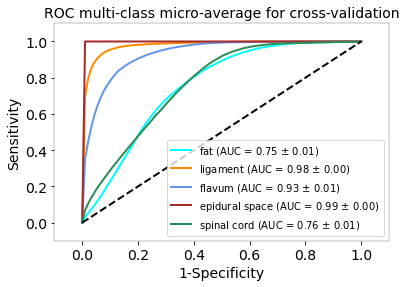

In [337]:
lw = 2

l_types = ["fat","ligament","flavum","epidural space","spinal cord"]

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'brown','seagreen'])

fig, ax = plt.subplots()

for i, type_name, color in zip([0,1,2,3,4], l_types, colors):
       
    plt.plot(mean_fpr, mean_tpr[i], color=color, lw=lw,
             label='{0} (AUC = {1:0.2f} $\pm$ {2:0.2f})'
             ''.format(type_name, mean_auc[i],std_auc[i] ))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])

ax.spines["top"].set_linewidth(0.25)
ax.spines["bottom"].set_linewidth(0.25)
ax.spines["left"].set_linewidth(0.25)
ax.spines["right"].set_linewidth(0.25)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

# plt.xlabel('1 - Specificity')
# plt.ylabel('Sensitivity')
plt.title('ROC multi-class micro-average for cross-validation', fontsize = 14)
plt.legend(loc="lower right")
plt.savefig("./ROC/ROC_5cat_inter_inceptionv3_average.jpg", dpi=300, bbox_inches='tight')

# ResNet50 Test binaries

## Bin1

In [346]:
# fat vs ligament
bool_fat_ligament = np.logical_or(a_label == "fat", a_label == "ligament")

a_label_num_bin_fat_ligament_pre = a_label[bool_fat_ligament]
a_label_num_bin_fat_ligament = np.copy(a_label_num_bin_fat_ligament_pre)

# Changing to numeric
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "fat"] = 0
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "ligament"] = 1
a_label_num_bin_fat_ligament = a_label_num_bin_fat_ligament.astype(int)

a_epidural_num_bin_fat_ligament = a_epidural_num[bool_fat_ligament]

In [347]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/"
dirs = os.listdir( path )

In [348]:
dirs

['time_total_K8_outer.npy',
 'time_total_K1_outer.npy',
 'time_total_K2_outer.npy',
 'model_outer_K8.h5',
 'time_total_K3_outer.npy',
 'time_total_K4_outer.npy',
 'time_total_K5_outer.npy',
 'time_total_K6_outer.npy',
 'time_total_K7_outer.npy',
 'history_K5_outer.pickle',
 'model_outer_K2.h5',
 'history_K4_outer.pickle',
 'pred_val_K8_outer.npy',
 'model_outer_K3.h5',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K2_outer.pickle',
 'model_outer_K1.h5',
 'history_K3_outer.pickle',
 'history_K1_outer.pickle',
 'model_outer_K4.h5',
 'pred_val_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'history_K8_outer.pickle',
 'pred_val_K3_outer.npy',
 'model_outer_K5.h5',
 'model_outer_K7.h5',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K6_outer.npy',
 'model_outer_K6.h5',
 'pred_val_K7_outer.npy']

In [349]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [350]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy']

In [351]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

pred_val_K8_outer.npy
k_outer =  8


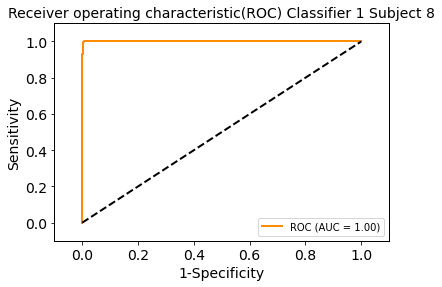

pred_val_K1_outer.npy
k_outer =  1


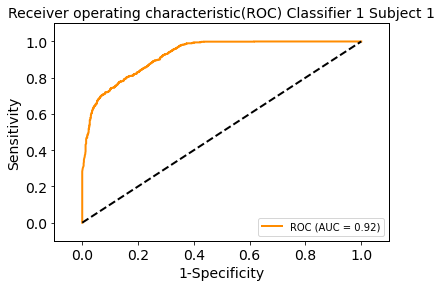

pred_val_K2_outer.npy
k_outer =  2


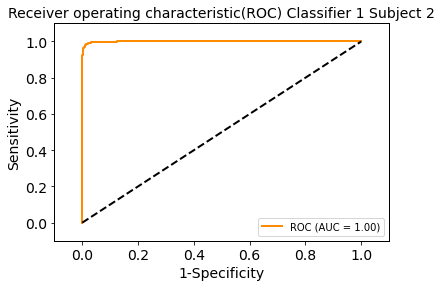

pred_val_K3_outer.npy
k_outer =  3


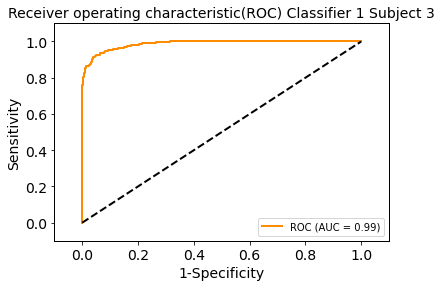

pred_val_K4_outer.npy
k_outer =  4


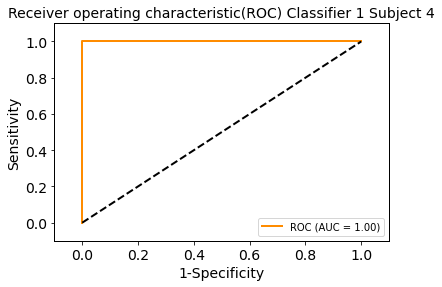

pred_val_K5_outer.npy
k_outer =  5


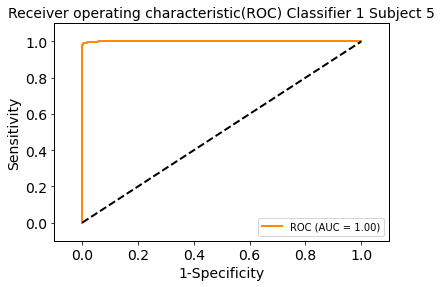

pred_val_K6_outer.npy
k_outer =  6


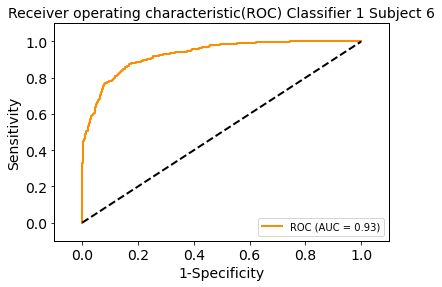

pred_val_K7_outer.npy
k_outer =  7


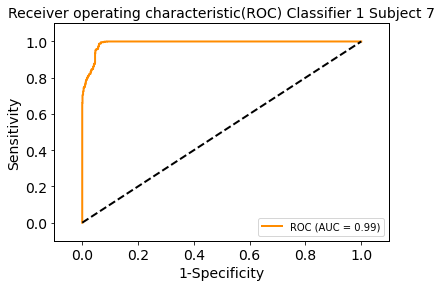

In [352]:
l_prob = []
l_test = []


for item in l_pred_files:
    
    fig, ax = plt.subplots()
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_fat_ligament != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                      a_label_num_bin_fat_ligament[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
          
    l_test.append(y_test)
    l_prob.append(prob_temp)


    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        

    lw = 2

    type_name = "ROC"
    
    plt.plot(fpr, tpr, color="darkorange", lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic(ROC) Classifier 1 Subject %d'%
              (k_outer), fontsize=14)
    plt.legend(loc="lower right")
    plt.savefig("./ROC/testing_subjects/ROC_classifier1_S%d.jpg"%(k_outer), dpi=300, bbox_inches='tight')
    plt.show()
        
#     break

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


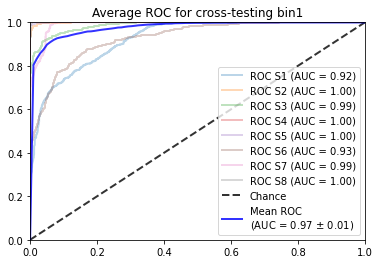

In [165]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_fat_ligament != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                      a_label_num_bin_fat_ligament[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.3, label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
       title="Average ROC for cross-testing bin1")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin1.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


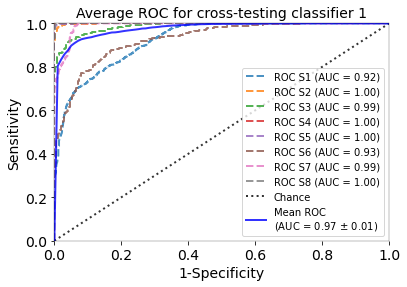

In [167]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_fat_ligament != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                      a_label_num_bin_fat_ligament[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)

tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

ax.spines["top"].set_linewidth(0.25)
ax.spines["bottom"].set_linewidth(0.25)
ax.spines["left"].set_linewidth(0.25)
ax.spines["right"].set_linewidth(0.25)
ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)
# ax.set(xlim=[0, 1], ylim=[0, 1],
#        title="Average ROC for cross-testing classifier 1", fontsize=14)
ax.set(xlim=[0, 1], ylim=[0, 1])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Average ROC for cross-testing classifier 1", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right",fontsize = "medium")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin1_v2.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


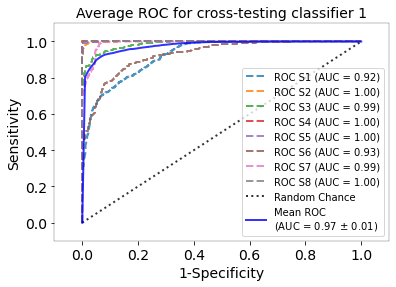

In [168]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_fat_ligament != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                      a_label_num_bin_fat_ligament[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Random Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)

tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)

ax.spines["top"].set_linewidth(0.25)
ax.spines["bottom"].set_linewidth(0.25)
ax.spines["left"].set_linewidth(0.25)
ax.spines["right"].set_linewidth(0.25)
ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)
# ax.set(xlim=[0, 1], ylim=[0, 1],
#        title="Average ROC for cross-testing classifier 1", fontsize=14)
ax.set(xlim=[-0.1, 1.1], ylim=[-0.1, 1.1])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Average ROC for cross-testing classifier 1", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right",fontsize = "medium")

# To fit everything in images 
# From https://stackoverflow.com/questions/10101700/moving-matplotlib-legend-outside-of-the-axis-makes-it-cutoff-by-the-figure-box
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin1_v3.jpg", dpi=300, bbox_inches='tight')
plt.show()

### Subject 1

In [2]:
import numpy as np

In [36]:
with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/pred_val_K1_outer.npy', 'rb') as f:
    prob_K1_outer = np.load(f)

In [37]:
pred_K1_outer = np.argmax(prob_K1_outer,axis = 1)
pred_K1_outer

array([0, 0, 1, ..., 1, 1, 1])

In [38]:
index = 1

bool_epidural_train = a_epidural_num_bin_fat_ligament != index
bool_epidural_test = ~bool_epidural_train

y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                  a_label_num_bin_fat_ligament[bool_epidural_test]  

In [39]:
pred_K1_outer[180:]

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
y_test[180:]

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
y_test.shape

(2000,)

In [42]:
pred_K1_outer.shape

(2000,)

In [56]:
np.random.seed(1234)
index_random = np.arange(2000)
np.random.shuffle(index_random)
index_random

array([1748,  934, 1033, ..., 1318,  723,  815])

In [54]:
index_random[:120]

array([1748,  934, 1033,  243,  928, 1598, 1837, 1709, 1430,  183,  142,
       1173,  216,  548, 1602,  220,   21, 1693,  375,  124, 1094,  852,
       1817, 1068,   87,  422,  232, 1752,  669,  980, 1918, 1450,   69,
        237, 1779,  123, 1898,  955, 1584,  859, 1291, 1406, 1130,  338,
        950, 1302,  623, 1354,  907,  836,  956,  324, 1250, 1870,  218,
        871,  483, 1320,  651,  662, 1473,  234,  637, 1483,  881, 1358,
        373, 1574,  867,  454, 1972,  616,   47,  878,  913, 1561,  516,
       1085, 1176, 1729, 1930, 1607, 1113, 1011,  284,  678, 1195,   78,
        276,  489,  188,  173, 1700, 1136,  579,  235, 1739, 1547, 1185,
       1799,  344,  488,  642, 1545,  466, 1220, 1884,  108,  441,  909,
       1221, 1487,  765, 1792, 1638,  130, 1265, 1782,  507,  830])

In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_K1_outer)

array([[689, 311],
       [ 26, 974]])

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test[index_random[:120]], pred_K1_outer[index_random[:120]])

array([[45, 20],
       [ 1, 54]])

In [61]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test[-120:], pred_K1_outer[-120:])

array([[  0,   0],
       [  3, 117]])

### Subject 7

In [78]:
import numpy as np

In [79]:
with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/pred_val_K7_outer.npy', 'rb') as f:
    prob_K7_outer = np.load(f)

In [80]:
pred_K7_outer = np.argmax(prob_K7_outer,axis = 1)
pred_K7_outer

array([1, 1, 1, ..., 0, 0, 0])

In [81]:
index = 7

bool_epidural_train = a_epidural_num_bin_fat_ligament != index
bool_epidural_test = ~bool_epidural_train

y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], \
                  a_label_num_bin_fat_ligament[bool_epidural_test]  

In [84]:
pred_K7_outer[180:]

array([1, 1, 1, ..., 0, 0, 0])

In [85]:
y_test[180:]

array([1, 1, 1, ..., 0, 0, 0])

In [86]:
y_test.shape

(2000,)

In [87]:
pred_K1_outer.shape

(2000,)

In [88]:
np.random.seed(1234)
index_random = np.arange(2000)
np.random.shuffle(index_random)
index_random

array([1748,  934, 1033, ..., 1318,  723,  815])

In [89]:
index_random[:120]

array([1748,  934, 1033,  243,  928, 1598, 1837, 1709, 1430,  183,  142,
       1173,  216,  548, 1602,  220,   21, 1693,  375,  124, 1094,  852,
       1817, 1068,   87,  422,  232, 1752,  669,  980, 1918, 1450,   69,
        237, 1779,  123, 1898,  955, 1584,  859, 1291, 1406, 1130,  338,
        950, 1302,  623, 1354,  907,  836,  956,  324, 1250, 1870,  218,
        871,  483, 1320,  651,  662, 1473,  234,  637, 1483,  881, 1358,
        373, 1574,  867,  454, 1972,  616,   47,  878,  913, 1561,  516,
       1085, 1176, 1729, 1930, 1607, 1113, 1011,  284,  678, 1195,   78,
        276,  489,  188,  173, 1700, 1136,  579,  235, 1739, 1547, 1185,
       1799,  344,  488,  642, 1545,  466, 1220, 1884,  108,  441,  909,
       1221, 1487,  765, 1792, 1638,  130, 1265, 1782,  507,  830])

In [90]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_K7_outer)

array([[ 885,  115],
       [   0, 1000]])

In [95]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test[index_random[:120]], pred_K7_outer[index_random[:120]])

array([[48,  7],
       [ 0, 65]])

In [99]:
y_test[:120]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [100]:
pred_K7_outer[:120]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test[:120], pred_K7_outer[:120])

array([[120]])

### All combinations Confusion Matrix

In [476]:
from sklearn.metrics import confusion_matrix

In [477]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/"
dirs = os.listdir( path )

In [478]:
dirs

['time_total_K8_outer.npy',
 'time_total_K1_outer.npy',
 'time_total_K2_outer.npy',
 'model_outer_K8.h5',
 'time_total_K3_outer.npy',
 'time_total_K4_outer.npy',
 'time_total_K5_outer.npy',
 'time_total_K6_outer.npy',
 'time_total_K7_outer.npy',
 'history_K5_outer.pickle',
 'model_outer_K2.h5',
 'history_K4_outer.pickle',
 'pred_val_K8_outer.npy',
 'model_outer_K3.h5',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K2_outer.pickle',
 'model_outer_K1.h5',
 'history_K3_outer.pickle',
 'history_K1_outer.pickle',
 'model_outer_K4.h5',
 'pred_val_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'history_K8_outer.pickle',
 'pred_val_K3_outer.npy',
 'model_outer_K5.h5',
 'model_outer_K7.h5',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K6_outer.npy',
 'model_outer_K6.h5',
 'pred_val_K7_outer.npy']

In [479]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [480]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy']

In [481]:
l_conf = []

# fat vs ligament
bool_fat_ligament = np.logical_or(a_label == "fat", a_label == "ligament")

a_label_num_bin_fat_ligament_pre = a_label[bool_fat_ligament]
a_label_num_bin_fat_ligament = np.copy(a_label_num_bin_fat_ligament_pre)

# Changing to numeric
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "fat"] = 0
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "ligament"] = 1
a_label_num_bin_fat_ligament = a_label_num_bin_fat_ligament.astype(int)

a_epidural_num_bin_fat_ligament = a_epidural_num[bool_fat_ligament]

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

#     # Get inner look
#     r_inner = re.compile(r'(?<=k)[0-9]+')
#     k_val = int(r_inner.search(item).group(0))
#     print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_fat_ligament != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], a_label_num_bin_fat_ligament[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_test, pred_temp))
    
    np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_bin1_K%s_outer.csv'%(k_outer), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
#     if k_val != 7:
    l_conf.append(temp_conf)

pred_val_K8_outer.npy
k_outer =  8
pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7


In [482]:
a_conf = np.stack(l_conf)
a_conf.shape

(8, 2, 2)

In [483]:
a_conf

array([[[ 997,    3],
        [  22,  978]],

       [[ 645,  355],
        [  20,  980]],

       [[1000,    0],
        [ 654,  346]],

       [[ 979,   21],
        [ 138,  862]],

       [[ 999,    1],
        [   0, 1000]],

       [[1000,    0],
        [  24,  976]],

       [[ 649,  351],
        [  59,  941]],

       [[ 885,  115],
        [   0, 1000]]])

In [484]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin1_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[894.25  105.75 ]
 [114.625 885.375]]


In [491]:
np.std(a_conf, axis=0, ddof=1)

array([[157.40643479, 157.40643479],
       [222.51480689, 222.51480689]])

In [426]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin1_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[21.03431962 21.03431962]
 [29.73479182 29.73479182]]


## Bin2

In [7]:
# ligament vs flavum
bool_ligament_flavum = np.logical_or(a_label == "ligament", a_label == "flavum")

a_label_num_bin_ligament_flavum_pre = a_label[bool_ligament_flavum]
a_label_num_bin_ligament_flavum = np.copy(a_label_num_bin_ligament_flavum_pre)

# Changing to numeric
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "ligament"] = 0
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "flavum"] = 1
a_label_num_bin_ligament_flavum = a_label_num_bin_ligament_flavum.astype(int)

a_epidural_num_bin_ligament_flavum = a_epidural_num[bool_ligament_flavum]

In [8]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/"
dirs = os.listdir( path )

In [9]:
dirs

['model_outer_K1.h5',
 'time_total_K8_outer.npy',
 'model_outer_K2.h5',
 'model_outer_K3.h5',
 'time_total_K2_outer.npy',
 'model_outer_K7.h5',
 'time_total_K3_outer.npy',
 'model_outer_K6.h5',
 'time_total_K1_outer.npy',
 'time_total_K6_outer.npy',
 'time_total_K7_outer.npy',
 'model_outer_K4.h5',
 'time_total_K4_outer.npy',
 'model_outer_K5.h5',
 'time_total_K5_outer.npy',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K5_outer.pickle',
 'history_K4_outer.pickle',
 'history_K1_outer.pickle',
 'history_K2_outer.pickle',
 'pred_val_K8_outer.npy',
 'history_K3_outer.pickle',
 'pred_val_K6_outer.npy',
 'history_K8_outer.pickle',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'model_outer_K8.h5',
 'pred_val_K1_outer.npy']

In [10]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [11]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K1_outer.npy']

In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

pred_val_K8_outer.npy
k_outer =  8


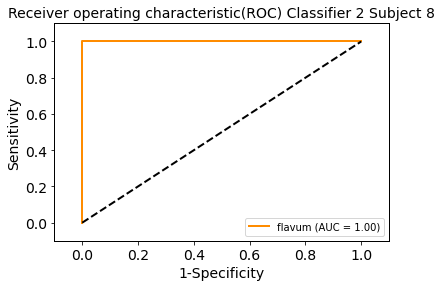

pred_val_K6_outer.npy
k_outer =  6


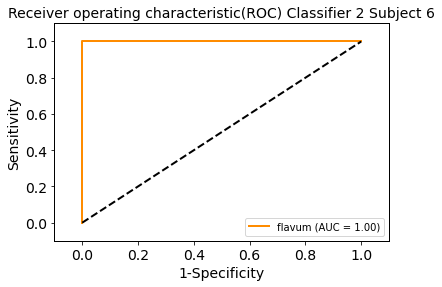

pred_val_K7_outer.npy
k_outer =  7


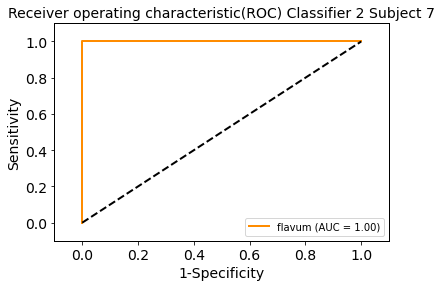

pred_val_K4_outer.npy
k_outer =  4


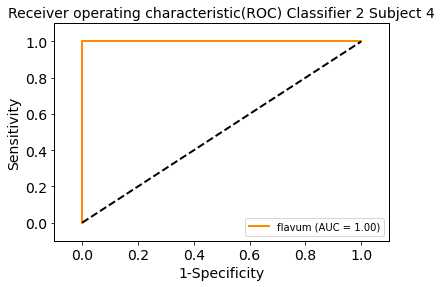

pred_val_K5_outer.npy
k_outer =  5


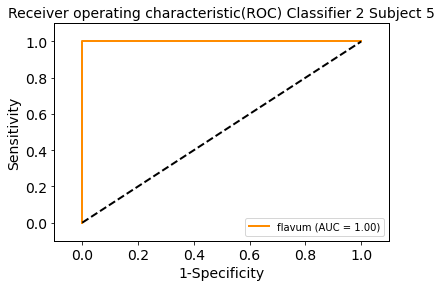

pred_val_K2_outer.npy
k_outer =  2


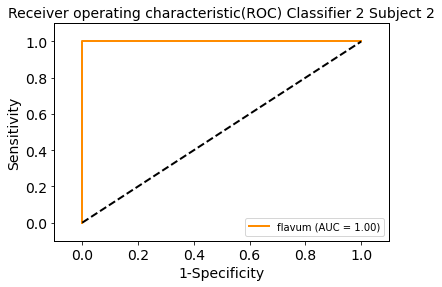

pred_val_K3_outer.npy
k_outer =  3


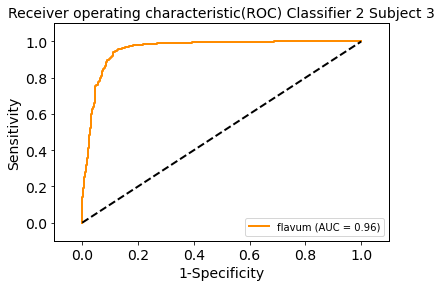

pred_val_K1_outer.npy
k_outer =  1


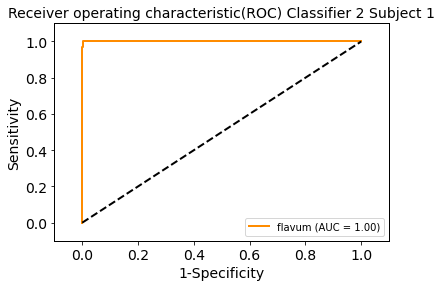

In [359]:
l_prob = []
l_test = []

for item in l_pred_files:
    print(item)
    # Get outter look
    fig, ax = plt.subplots()
    
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], \
                      a_label_num_bin_ligament_flavum[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
          
    l_test.append(y_test)
    l_prob.append(prob_temp)


    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        

    lw = 2

    type_name = "flavum"
    
    plt.plot(fpr, tpr, color="darkorange", lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic(ROC) Classifier 2 Subject %d'%
              (k_outer), fontsize=14)
    
    plt.legend(loc="lower right")
    plt.savefig("./ROC/testing_subjects/ROC_classifier2_S%d.jpg"%(k_outer), dpi=300, bbox_inches='tight')   
    plt.show()
        
#     break

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


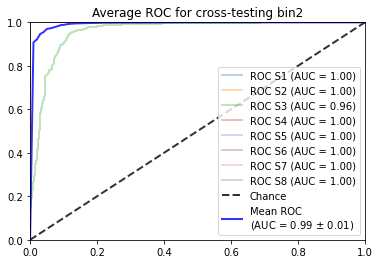

In [138]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], \
                      a_label_num_bin_ligament_flavum[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.3, label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')





ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
       title="Average ROC for cross-testing bin2")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin2.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


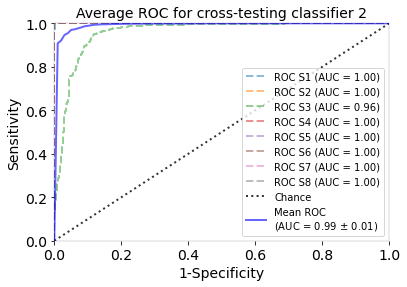

In [177]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], \
                      a_label_num_bin_ligament_flavum[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.5,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b', linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.6)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0])

ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Average ROC for cross-testing classifier 2", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right",fontsize = "medium")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin2_v2.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


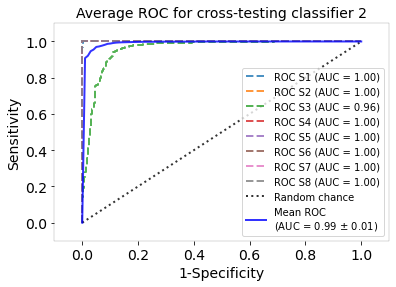

In [15]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 
lw = 2

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], \
                      a_label_num_bin_ligament_flavum[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Random chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b', linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.1, 1.1], ylim=[-0.1, 1.1])

ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title("Average ROC for cross-testing classifier 2", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right",fontsize = "medium")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin2_v3.jpg", dpi=300, bbox_inches='tight')
plt.show()

### All combinations Confusion Matrix

In [427]:
from sklearn.metrics import confusion_matrix

In [428]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/"
dirs = os.listdir( path )

In [429]:
dirs

['model_outer_K1.h5',
 'time_total_K8_outer.npy',
 'model_outer_K2.h5',
 'model_outer_K3.h5',
 'time_total_K2_outer.npy',
 'model_outer_K7.h5',
 'time_total_K3_outer.npy',
 'model_outer_K6.h5',
 'time_total_K1_outer.npy',
 'time_total_K6_outer.npy',
 'time_total_K7_outer.npy',
 'model_outer_K4.h5',
 'time_total_K4_outer.npy',
 'model_outer_K5.h5',
 'time_total_K5_outer.npy',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K5_outer.pickle',
 'history_K4_outer.pickle',
 'history_K1_outer.pickle',
 'history_K2_outer.pickle',
 'pred_val_K8_outer.npy',
 'history_K3_outer.pickle',
 'pred_val_K6_outer.npy',
 'history_K8_outer.pickle',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'model_outer_K8.h5',
 'pred_val_K1_outer.npy']

In [430]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [431]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K1_outer.npy']

In [432]:
l_conf = []

# ligament vs flavum
bool_ligament_flavum = np.logical_or(a_label == "ligament", a_label == "flavum")

a_label_num_bin_ligament_flavum_pre = a_label[bool_ligament_flavum]
a_label_num_bin_ligament_flavum = np.copy(a_label_num_bin_ligament_flavum_pre)

# Changing to numeric
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "ligament"] = 0
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "flavum"] = 1
a_label_num_bin_ligament_flavum = a_label_num_bin_ligament_flavum.astype(int)

a_epidural_num_bin_ligament_flavum = a_epidural_num[bool_ligament_flavum]

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

#     # Get inner look
#     r_inner = re.compile(r'(?<=k)[0-9]+')
#     k_val = int(r_inner.search(item).group(0))
#     print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], a_label_num_bin_ligament_flavum[bool_epidural_test] 
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_test, pred_temp))
    
    np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_bin2_K%s_outer.csv'%(k_outer), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
#     if k_val != 7:
    l_conf.append(temp_conf)

pred_val_K8_outer.npy
k_outer =  8
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K1_outer.npy
k_outer =  1


In [433]:
a_conf = np.stack(l_conf)
a_conf.shape

(8, 2, 2)

In [434]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin2_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[982.25   17.75 ]
 [ 26.375 973.625]]


In [435]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin2_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[3.45063585 3.45063585]
 [7.98497872 7.98497872]]


## Bin3b

In [360]:
# ligament vs flavum
bool_flavum_empty = np.logical_or(a_label == "flavum", a_label == "empty" )

a_label_num_bin_flavum_empty_pre = a_label[bool_flavum_empty]
a_label_num_bin_flavum_empty = np.copy(a_label_num_bin_flavum_empty_pre)

# Changing to numeric
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "flavum"] = 0
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "empty"] = 1
a_label_num_bin_flavum_empty = a_label_num_bin_flavum_empty.astype(int)

a_epidural_num_bin_flavum_empty = a_epidural_num[bool_flavum_empty]

In [361]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/"
dirs = os.listdir( path )

In [362]:
dirs

['model_outer_K7.h5',
 'time_total_K8_outer.npy',
 'model_outer_K6.h5',
 'pred_val_K8_outer.npy',
 'model_outer_K4.h5',
 'model_outer_K5.h5',
 'pred_val_K5_outer.npy',
 'pred_val_K4_outer.npy',
 'model_outer_K1.h5',
 'time_total_K1_outer.npy',
 'pred_val_K7_outer.npy',
 'time_total_K2_outer.npy',
 'pred_val_K6_outer.npy',
 'time_total_K3_outer.npy',
 'time_total_K4_outer.npy',
 'pred_val_K1_outer.npy',
 'model_outer_K2.h5',
 'time_total_K5_outer.npy',
 'time_total_K6_outer.npy',
 'pred_val_K3_outer.npy',
 'model_outer_K3.h5',
 'time_total_K7_outer.npy',
 'pred_val_K2_outer.npy',
 'history_K5_outer.pickle',
 'history_K4_outer.pickle',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K2_outer.pickle',
 'history_K3_outer.pickle',
 'history_K1_outer.pickle',
 'model_outer_K8.h5',
 'history_K8_outer.pickle']

In [363]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [364]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K2_outer.npy']

In [365]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

pred_val_K8_outer.npy
k_outer =  8


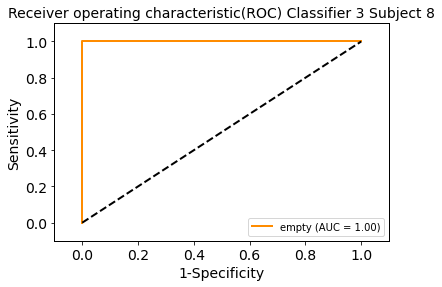

pred_val_K5_outer.npy
k_outer =  5


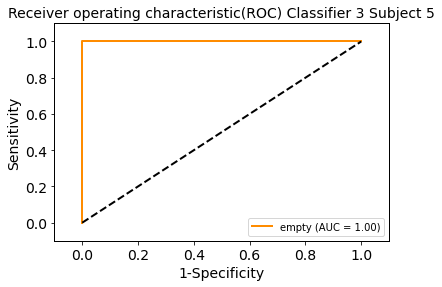

pred_val_K4_outer.npy
k_outer =  4


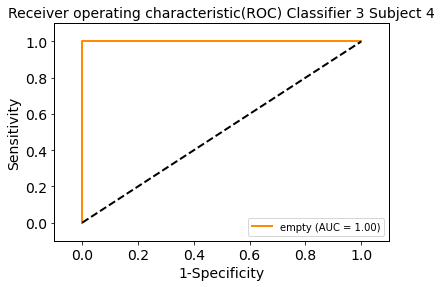

pred_val_K7_outer.npy
k_outer =  7


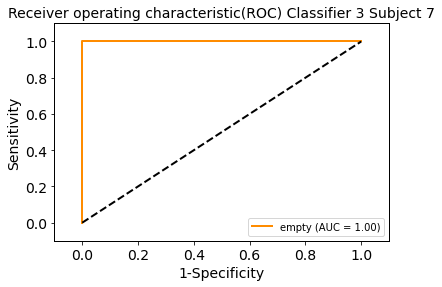

pred_val_K6_outer.npy
k_outer =  6


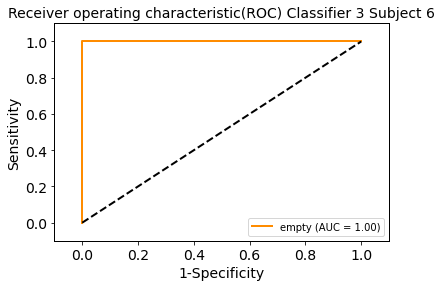

pred_val_K1_outer.npy
k_outer =  1


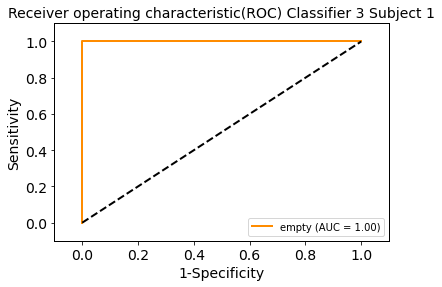

pred_val_K3_outer.npy
k_outer =  3


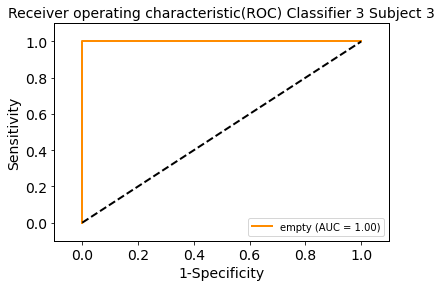

pred_val_K2_outer.npy
k_outer =  2


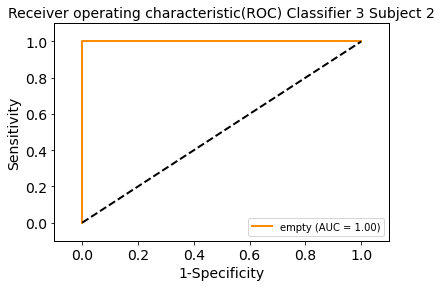

In [366]:
l_prob = []
l_test = []

for item in l_pred_files:
    print(item)
    # Get outter look
    fig, ax = plt.subplots()
    
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_flavum_empty != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], \
                      a_label_num_bin_flavum_empty[bool_epidural_test]   
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
          
    l_test.append(y_test)
    l_prob.append(prob_temp)


    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        

    lw = 2

    type_name = "empty"
    
    plt.plot(fpr, tpr, color="darkorange", lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic(ROC) Classifier 3 Subject %d'%
              (k_outer), fontsize=14)
    plt.legend(loc="lower right")
    plt.savefig("./ROC/testing_subjects/ROC_classifier3_S%d.jpg"%(k_outer), dpi=300, bbox_inches='tight')
    plt.show()
        
#     break

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


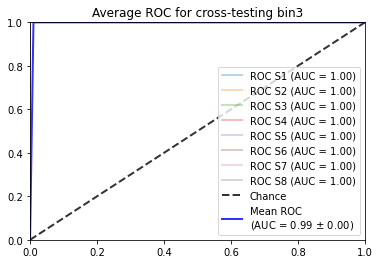

In [187]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_flavum_empty != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], \
                      a_label_num_bin_flavum_empty[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.3, label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
       title="Average ROC for cross-testing bin3")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin3.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


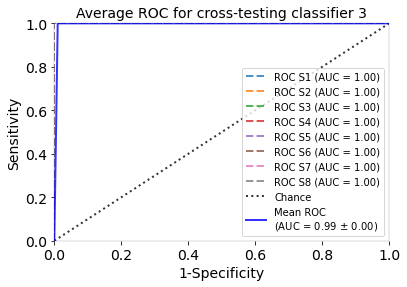

In [99]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_flavum_empty != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], \
                      a_label_num_bin_flavum_empty[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--', 
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',linestyle='-', 
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0])
ax.set_title("Average ROC for cross-testing classifier 3", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin3_v2.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


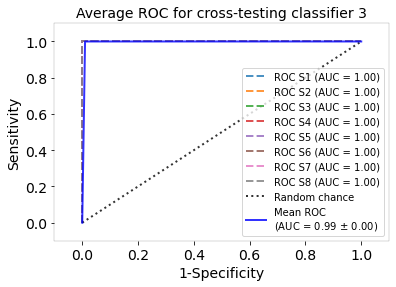

In [188]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_flavum_empty != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], \
                      a_label_num_bin_flavum_empty[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--', 
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Random chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',linestyle='-', 
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.1, 1.1], ylim=[-0.1, 1.1])
ax.set_title("Average ROC for cross-testing classifier 3", fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin3_v3.jpg", dpi=300, bbox_inches='tight')
plt.show()

### All combinations Confusion Matrix

In [436]:
from sklearn.metrics import confusion_matrix

In [438]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/"
dirs = os.listdir( path )

In [439]:
dirs

['model_outer_K7.h5',
 'time_total_K8_outer.npy',
 'model_outer_K6.h5',
 'pred_val_K8_outer.npy',
 'model_outer_K4.h5',
 'model_outer_K5.h5',
 'pred_val_K5_outer.npy',
 'pred_val_K4_outer.npy',
 'model_outer_K1.h5',
 'time_total_K1_outer.npy',
 'pred_val_K7_outer.npy',
 'time_total_K2_outer.npy',
 'pred_val_K6_outer.npy',
 'time_total_K3_outer.npy',
 'time_total_K4_outer.npy',
 'pred_val_K1_outer.npy',
 'model_outer_K2.h5',
 'time_total_K5_outer.npy',
 'time_total_K6_outer.npy',
 'pred_val_K3_outer.npy',
 'model_outer_K3.h5',
 'time_total_K7_outer.npy',
 'pred_val_K2_outer.npy',
 'history_K5_outer.pickle',
 'history_K4_outer.pickle',
 'history_K6_outer.pickle',
 'history_K7_outer.pickle',
 'history_K2_outer.pickle',
 'history_K3_outer.pickle',
 'history_K1_outer.pickle',
 'model_outer_K8.h5',
 'history_K8_outer.pickle']

In [440]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [441]:
l_pred_files

['pred_val_K8_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K2_outer.npy']

In [442]:
l_conf = []

# flavum vs empty
bool_flavum_empty = np.logical_or(a_label == "flavum", a_label == "empty" )

a_label_num_bin_flavum_empty_pre = a_label[bool_flavum_empty]
a_label_num_bin_flavum_empty = np.copy(a_label_num_bin_flavum_empty_pre)

# Changing to numeric
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "flavum"] = 0
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "empty"] = 1
a_label_num_bin_flavum_empty = a_label_num_bin_flavum_empty.astype(int)

a_epidural_num_bin_flavum_empty = a_epidural_num[bool_flavum_empty]

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

#     # Get inner look
#     r_inner = re.compile(r'(?<=k)[0-9]+')
#     k_val = int(r_inner.search(item).group(0))
#     print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_flavum_empty != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], a_label_num_bin_flavum_empty[bool_epidural_test]  
    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_test, pred_temp))
    
    np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_bin3_K%s_outer.csv'%(k_outer), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
#     if k_val != 7:
    l_conf.append(temp_conf)

pred_val_K8_outer.npy
k_outer =  8
pred_val_K5_outer.npy
k_outer =  5
pred_val_K4_outer.npy
k_outer =  4
pred_val_K7_outer.npy
k_outer =  7
pred_val_K6_outer.npy
k_outer =  6
pred_val_K1_outer.npy
k_outer =  1
pred_val_K3_outer.npy
k_outer =  3
pred_val_K2_outer.npy
k_outer =  2


In [443]:
a_conf = np.stack(l_conf)
a_conf.shape

(8, 2, 2)

In [444]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin3_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[ 996.875    3.125]
 [   0.    1000.   ]]


In [445]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin3_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[1.18113898 1.18113898]
 [0.         0.        ]]


## Bin4

In [446]:
#  empty vs spinalcord
bool_empty_spinalcord = np.logical_or(a_label == "empty", a_label == "spinalcord" )

a_label_num_bin_empty_spinalcord_pre = a_label[bool_empty_spinalcord]
a_label_num_bin_empty_spinalcord = np.copy(a_label_num_bin_empty_spinalcord_pre)

# Changing to numeric
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "empty"] = 0
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "spinalcord"] = 1
a_label_num_bin_empty_spinalcord = a_label_num_bin_empty_spinalcord.astype(int)

a_images_1D_bin_empty_spinalcord = a_images_1D[bool_empty_spinalcord]
a_epidural_num_bin_empty_spinalcord = a_epidural_num[bool_empty_spinalcord]

In [447]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/"
dirs = os.listdir( path )

In [448]:
dirs

['model_outer_K7.h5',
 'history_K8_outer.pickle',
 'model_outer_K6.h5',
 'model_outer_K4.h5',
 'model_outer_K5.h5',
 'history_K4_outer.pickle',
 'model_outer_K1.h5',
 'history_K5_outer.pickle',
 'history_K7_outer.pickle',
 'history_K6_outer.pickle',
 'history_K3_outer.pickle',
 'model_outer_K2.h5',
 'history_K2_outer.pickle',
 'model_outer_K3.h5',
 'history_K1_outer.pickle',
 'time_total_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'time_total_K3_outer.npy',
 'pred_val_K1_outer.npy',
 'time_total_K2_outer.npy',
 'pred_val_K6_outer.npy',
 'time_total_K5_outer.npy',
 'time_total_K4_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'time_total_K7_outer.npy',
 'time_total_K6_outer.npy',
 'pred_val_K5_outer.npy',
 'model_outer_K8.h5',
 'time_total_K8_outer.npy',
 'pred_val_K8_outer.npy']

In [449]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [450]:
l_pred_files

['pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K8_outer.npy']

In [451]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

pred_val_K2_outer.npy
k_outer =  2


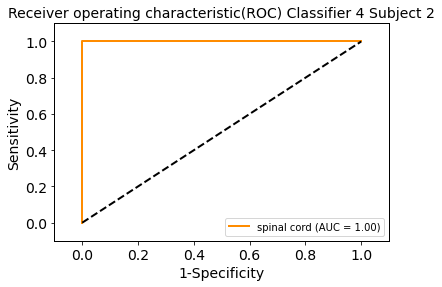

pred_val_K3_outer.npy
k_outer =  3


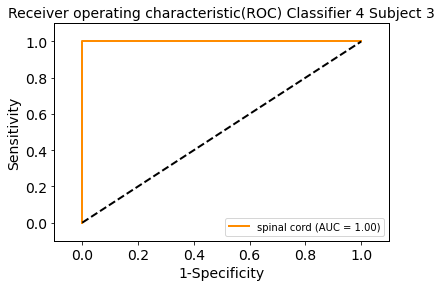

pred_val_K1_outer.npy
k_outer =  1


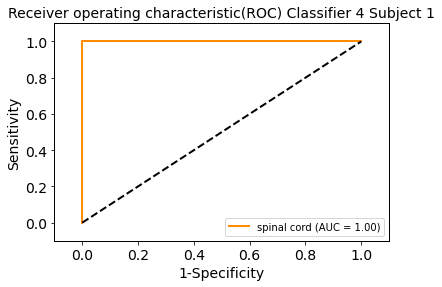

pred_val_K6_outer.npy
k_outer =  6


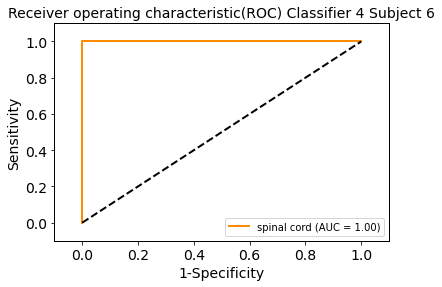

pred_val_K7_outer.npy
k_outer =  7


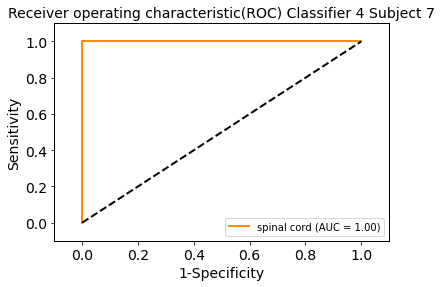

pred_val_K4_outer.npy
k_outer =  4


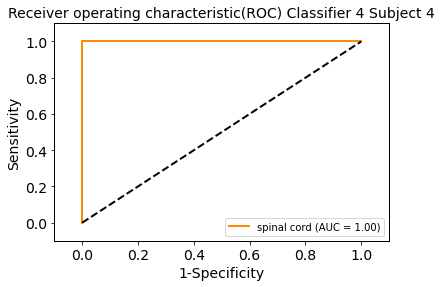

pred_val_K5_outer.npy
k_outer =  5


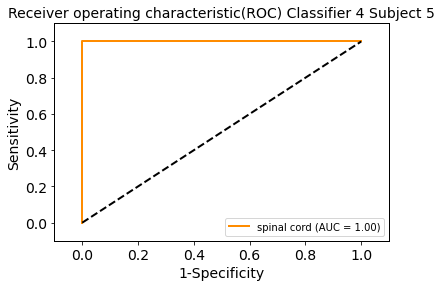

pred_val_K8_outer.npy
k_outer =  8


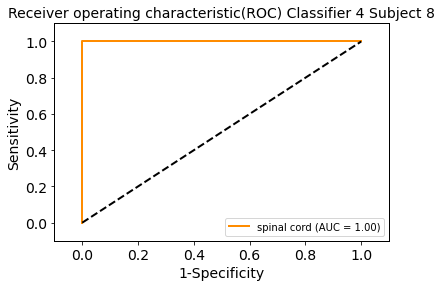

In [374]:
l_prob = []
l_test = []

for item in l_pred_files:
    print(item)
    # Get outter look
    fig, ax = plt.subplots()

    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], \
                      a_label_num_bin_empty_spinalcord[bool_epidural_test]   
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    # Change TO DO
          
    l_test.append(y_test)
    l_prob.append(prob_temp)


    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        

    lw = 2

    type_name = "spinal cord"
    
    plt.plot(fpr, tpr, color="darkorange", lw=lw,
             label='{0} (AUC = {1:0.2f})'
             ''.format(type_name, roc_auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    
    ax.spines["top"].set_linewidth(1)
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    ax.spines["right"].set_linewidth(1)
    
    ax.set_xlabel('1-Specificity', fontsize=14)
    ax.set_ylabel('Sensitivity', fontsize=14)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
#     plt.xlabel('1 - Specificity')
#     plt.ylabel('Sensitivity')
    plt.title('Receiver operating characteristic(ROC) Classifier 4 Subject %d'%
              (k_outer), fontsize=14)
    
    plt.legend(loc="lower right")
    plt.savefig("./ROC/testing_subjects/ROC_classifier4_S%d.jpg"%(k_outer), dpi=300, bbox_inches='tight')
    plt.show()
        
#     break

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


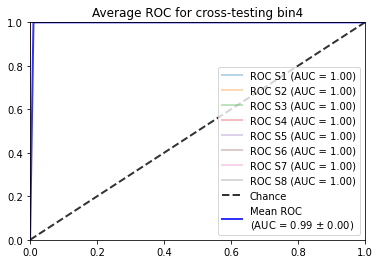

In [156]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], \
                      a_label_num_bin_empty_spinalcord[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.3, label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    


ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0],
       title="Average ROC for cross-testing bin4")
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin4.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


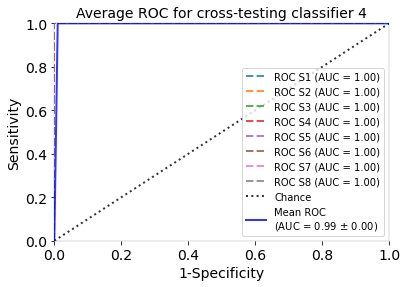

In [113]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], \
                      a_label_num_bin_empty_spinalcord[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    
ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set_title("Average ROC for cross-testing classifier 4", fontdict={'fontsize': 14, 'fontweight': 'medium'})

ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.0])
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin4_v2.jpg", dpi=300)
plt.show()

pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7
pred_val_K8_outer.npy
k_outer =  8


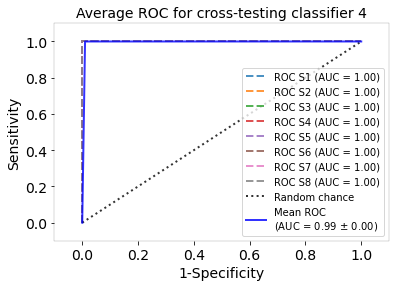

In [196]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()

l_pred_files.sort() 

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)      
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], \
                      a_label_num_bin_empty_spinalcord[bool_epidural_test]  
   
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    n_classes = 2

    fpr, tpr, _ = roc_curve(y_test, prob_temp[:,1])
    roc_auc = auc(fpr, tpr)        
        
    plt.plot(fpr, tpr, lw=lw, alpha = 0.8,
             linestyle='--',
             label = "ROC S%d (AUC = %.2f)"% (k_outer, roc_auc))
    
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    
ax.spines["top"].set_linewidth(0.15)
ax.spines["bottom"].set_linewidth(0.15)
ax.spines["left"].set_linewidth(0.15)
ax.spines["right"].set_linewidth(0.15)

ax.set_xlabel('1-Specificity', fontsize=14)
ax.set_ylabel('Sensitivity', fontsize=14)

ax.tick_params(axis='both', which='major', labelsize=14)

ax.plot([0, 1], [0, 1], linestyle=':', lw=2, color='black',
        label='Random chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr) 
std_auc = np.std(aucs, ddof=1)/ (8**0.5)
ax.plot(mean_fpr, mean_tpr, color='b',
        linestyle='-',
        label='Mean ROC\n(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                 label=r'$\pm$ 1 std. dev.')

ax.set_title("Average ROC for cross-testing classifier 4", fontdict={'fontsize': 14, 'fontweight': 'medium'})

ax.set(xlim=[-0.1, 1.1], ylim=[-0.1, 1.1])
ax.legend(loc="lower right")
plt.savefig("./ROC/ROC_resnet50_cross-testing_bin4_v3.jpg", dpi=300, bbox_inches='tight')
plt.show()

### All combinations Confusion Matrix

In [459]:
from sklearn.metrics import confusion_matrix

In [460]:
import pandas as pd
import numpy as np
import pickle

import os, sys
# Open a file
path = "/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/"
dirs = os.listdir( path )

In [461]:
dirs

['model_outer_K7.h5',
 'history_K8_outer.pickle',
 'model_outer_K6.h5',
 'model_outer_K4.h5',
 'model_outer_K5.h5',
 'history_K4_outer.pickle',
 'model_outer_K1.h5',
 'history_K5_outer.pickle',
 'history_K7_outer.pickle',
 'history_K6_outer.pickle',
 'history_K3_outer.pickle',
 'model_outer_K2.h5',
 'history_K2_outer.pickle',
 'model_outer_K3.h5',
 'history_K1_outer.pickle',
 'time_total_K1_outer.npy',
 'pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'time_total_K3_outer.npy',
 'pred_val_K1_outer.npy',
 'time_total_K2_outer.npy',
 'pred_val_K6_outer.npy',
 'time_total_K5_outer.npy',
 'time_total_K4_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'time_total_K7_outer.npy',
 'time_total_K6_outer.npy',
 'pred_val_K5_outer.npy',
 'model_outer_K8.h5',
 'time_total_K8_outer.npy',
 'pred_val_K8_outer.npy']

In [462]:
import re

l_pred_files = []

r = re.compile('pred')

for item in dirs:

    res = r.search(item)
    if res != None:
        l_pred_files.append(item)

In [463]:
l_pred_files

['pred_val_K2_outer.npy',
 'pred_val_K3_outer.npy',
 'pred_val_K1_outer.npy',
 'pred_val_K6_outer.npy',
 'pred_val_K7_outer.npy',
 'pred_val_K4_outer.npy',
 'pred_val_K5_outer.npy',
 'pred_val_K8_outer.npy']

In [492]:
l_conf = []

#  empty vs spinalcord
bool_empty_spinalcord = np.logical_or(a_label == "empty", a_label == "spinalcord" )

a_label_num_bin_empty_spinalcord_pre = a_label[bool_empty_spinalcord]
a_label_num_bin_empty_spinalcord = np.copy(a_label_num_bin_empty_spinalcord_pre)

# Changing to numeric
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "empty"] = 0
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "spinalcord"] = 1
a_label_num_bin_empty_spinalcord = a_label_num_bin_empty_spinalcord.astype(int)

a_images_1D_bin_empty_spinalcord = a_images_1D[bool_empty_spinalcord]
a_epidural_num_bin_empty_spinalcord = a_epidural_num[bool_empty_spinalcord]

a_epidural_num_bin_flavum_empty = a_epidural_num[bool_flavum_empty]

for item in l_pred_files:
    print(item)
    # Get outter look
    r_outer = re.compile(r'(?<=K)[0-9]+')
    k_outer = int(r_outer.search(item).group(0))
    print("k_outer = ", k_outer)

#     # Get inner look
#     r_inner = re.compile(r'(?<=k)[0-9]+')
#     k_val = int(r_inner.search(item).group(0))
#     print("k_val = ", k_val)
       
        
    with open('/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/' + item, 'rb') as f:
        prob_temp = np.load(f)
        
    a_selected_epidural_val = [k_val]
    index = k_outer

    bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
    bool_epidural_test = ~bool_epidural_train
    
    y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], \
                        a_label_num_bin_empty_spinalcord[bool_epidural_test]    
    pred_temp = np.argmax(prob_temp, axis=-1)
    
    temp_conf = np.array(confusion_matrix(y_test, pred_temp))
    
    np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_bin4_K%s_outer.csv'%(k_outer), temp_conf, delimiter=",", fmt="%.0f")
    
    # Individual 7 have  700 instead of  1000 images for spinal cord
    if k_outer != 7:
        l_conf.append(temp_conf)

pred_val_K8_outer.npy
k_outer =  8
pred_val_K1_outer.npy
k_outer =  1
pred_val_K2_outer.npy
k_outer =  2
pred_val_K3_outer.npy
k_outer =  3
pred_val_K4_outer.npy
k_outer =  4
pred_val_K5_outer.npy
k_outer =  5
pred_val_K6_outer.npy
k_outer =  6
pred_val_K7_outer.npy
k_outer =  7


In [493]:
a_conf = np.stack(l_conf)
a_conf.shape

(7, 2, 2)

In [494]:
a_mean_conf = np.mean(a_conf, axis = 0)
print(a_mean_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin4_average.csv', a_mean_conf, delimiter=",", fmt="%.0f")

[[1000.    0.]
 [   0. 1000.]]


In [495]:
a_std_err_conf = np.std(a_conf, axis=0, ddof=0)/7
print(a_std_err_conf)
np.savetxt('confusion_matrix_testing_ResNet50/Confusion_matrix_resnet50_bin4_std_err.csv', a_std_err_conf, delimiter=",", fmt="%.0f")

[[0. 0.]
 [0. 0.]]
